# Assignment – 1
1. Dataset: For the dataset attached (Assignment 1 Dataset.xlsx) along with this file, write the
Python code to perform the following actions:
a. For all the numerical columns like name_email_similarity, days_since_request,
intended_balcon_amount, velocity_24h, velocity_4w, session_length_in_minutes etc,
clean the dataset whenever text characters are present.
b. For payment_type and employment_status fields, certain mapping is given in adjacent
tabs to the main dataset. Map the real names in the main dataset using the same.
c. Find out exception data points in numerical columns if any using any of the statistical
techniques you prefer.
2. Editor: The Python code can be written in any editor of your choice or Jupyter Notebook or
Kaggle Notebook
3. Submission: Code files or Notebook link along with the output dataset in a .xlsx file.
4. Evaluation: Will be based on the review of the code

In [1]:
#!pip install openpyxl

In [4]:
import pandas as pd
import numpy as np

In [5]:
# Define the file path
FILEPATH = "Assignment 1 Dataset.xlsx"

# Read all sheets from the Excel file
dataframes = pd.read_excel(FILEPATH, sheet_name=None)

# Access the main dataset
df = dataframes['Dataset']


In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.1,0.054656,-1,55,50,0.029642,-0.779957,AB,1735,13175.837145,5925.920907,5595.483070,5,5,CC,74,1,BB,1,1,15,0,200,0,INTERNET,5.063178,linux,0,1,0,2,-0.833286,-0.239018
1,0,0.2,0.516874,-1,178,50,0.036917,-0.471011,AB,910,7956.210922,4508.184737,5180.433142,730,5,CC,164,0,BB,1,1,31,0,200,0,INTERNET,5.403648,linux,0,1,0,3,-0.044042,1.174898
2,0,0.1,0.870572,-1,26,30,11.838249,51.068616,AA,1730,7955.039183,4086.450169,4934.869502,12,8,CA,169,1,BC,0,1,28,1,200,0,INTERNET,6.701977,linux,1,1,0,2,2.094070,0.643121
3,0,0.1,0.234248,29,9,20,0.030793,16.341333,AA,533,3815.606033,2803.209535,3209.731744,6,2,CA,75,0,BC,1,1,1,0,200,0,INTERNET,12.787474,linux,1,1,0,7,-1.060523,0.285319
4,0,0.2,0.909504,11,5,30,0.036117,-1.151589,AB,2935,9462.987447,4884.037861,5530.618472,11,3,CB,129,1,BB,0,1,31,1,200,0,INTERNET,4.670977,linux,0,1,0,2,1.989430,-0.803668


In [9]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'employment_status', 'credit_risk_score', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source', 'session_length_in_minutes', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month', 'x1', 'x2'], dtype='object')

In [10]:
df.isna().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [11]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [12]:
df['fraud_bool'].unique()

array([0, 1])

In [14]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        91 non-null     int64  
 1   income                            91 non-null     float64
 2   name_email_similarity             91 non-null     float64
 3   prev_address_months_count         91 non-null     int64  
 4   current_address_months_count      91 non-null     int64  
 5   customer_age                      91 non-null     int64  
 6   days_since_request                91 non-null     float64
 7   intended_balcon_amount            91 non-null     float64
 8   payment_type                      91 non-null     object 
 9   zip_count_4w                      91 non-null     int64  
 10  velocity_6h                       91 non-null     float64
 11  velocity_24h                      91 non-null     float64
 12  velocity_4

In [16]:
# List of numerical columns to clean
numerical_columns = [
    'name_email_similarity', 'prev_address_months_count', 'current_address_months_count',
    'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w',
    'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
    'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count',
    'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w',
    'device_fraud_count', 'x1', 'x2'
]

# Function to clean numerical columns
def clean_numeric_column(column):
    return pd.to_numeric(column, errors='coerce')

# Apply the cleaning function to the specified columns
for col in numerical_columns:
    df[col] = clean_numeric_column(df[col])

# Display information about the cleaned dataset
print("\
Dataset info after cleaning:")
print(df.info())

Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fraud_bool                        91 non-null     int64  
 1   income                            91 non-null     float64
 2   name_email_similarity             91 non-null     float64
 3   prev_address_months_count         91 non-null     int64  
 4   current_address_months_count      91 non-null     int64  
 5   customer_age                      91 non-null     int64  
 6   days_since_request                91 non-null     float64
 7   intended_balcon_amount            91 non-null     float64
 8   payment_type                      91 non-null     object 
 9   zip_count_4w                      91 non-null     int64  
 10  velocity_6h                       91 non-null     float64
 11  velocity_24h                      91 non-nul

In [18]:
# Display the first few rows of the cleaned dataset
print("\
First few rows of the cleaned dataset:")
df.head()

First few rows of the cleaned dataset:


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.1,0.054656,-1,55,50,0.029642,-0.779957,AB,1735,13175.837145,5925.920907,5595.483070,5,5,CC,74,1,BB,1,1,15,0,200,0,INTERNET,5.063178,linux,0,1,0,2,-0.833286,-0.239018
1,0,0.2,0.516874,-1,178,50,0.036917,-0.471011,AB,910,7956.210922,4508.184737,5180.433142,730,5,CC,164,0,BB,1,1,31,0,200,0,INTERNET,5.403648,linux,0,1,0,3,-0.044042,1.174898
2,0,0.1,0.870572,-1,26,30,11.838249,51.068616,AA,1730,7955.039183,4086.450169,4934.869502,12,8,CA,169,1,BC,0,1,28,1,200,0,INTERNET,6.701977,linux,1,1,0,2,2.094070,0.643121
3,0,0.1,0.234248,29,9,20,0.030793,16.341333,AA,533,3815.606033,2803.209535,3209.731744,6,2,CA,75,0,BC,1,1,1,0,200,0,INTERNET,12.787474,linux,1,1,0,7,-1.060523,0.285319
4,0,0.2,0.909504,11,5,30,0.036117,-1.151589,AB,2935,9462.987447,4884.037861,5530.618472,11,3,CB,129,1,BB,0,1,31,1,200,0,INTERNET,4.670977,linux,0,1,0,2,1.989430,-0.803668


In [19]:
# Check for any remaining non-numeric values in the specified columns
print("\
Checking for any remaining non-numeric values in the specified columns:")
for col in numerical_columns:
    non_numeric = df[df[col].apply(lambda x: not pd.api.types.is_numeric_dtype(x))][col]
    if not non_numeric.empty:
        print(f"Non-numeric values in {col}:")
        print(non_numeric)
    else:
        print(f"No non-numeric values found in {col}")

print("\
Cleaning process completed.")

Checking for any remaining non-numeric values in the specified columns:
Non-numeric values in name_email_similarity:
0     0.054656
1     0.516874
2     0.870572
3     0.234248
4     0.909504
5     0.994589
6     0.528534
7     0.213721
8     0.734329
9     0.756739
10    0.181568
11    0.639981
12    0.209253
13    0.056863
14    0.675682
15    0.219158
16    0.154980
17    0.990735
18    0.564969
19    0.529224
20    0.895434
21    0.914013
22    0.047663
23    0.231898
24    0.512038
25    0.235338
26    0.336611
27    0.903853
28    0.891488
29    0.745333
30    0.866463
31    0.235794
32    0.307137
33    0.861904
34    0.778183
35    0.672875
36    0.990202
37    0.166859
38    0.333352
39    0.542324
40    0.689148
41    0.592441
42    0.238011
43    0.471841
44    0.826077
45    0.745876
46    0.674765
47    0.476256
48    0.862752
49    0.644401
50    0.615046
51    0.767091
52    0.875719
53    0.007421
54    0.285260
55    0.112697
56    0.993579
57    0.774911
58    0.79207

In [20]:
# Load the payment_type mapping
payment_type_mapping = pd.read_excel('Assignment 1 Dataset.xlsx', sheet_name='Payment Type')

# Load the employment_status mapping
employment_status_mapping = pd.read_excel('Assignment 1 Dataset.xlsx', sheet_name='Employment Type')

# Map the payment_type
df['payment_type'] = df['payment_type'].map(dict(zip(payment_type_mapping['payment_type'], payment_type_mapping['Name'])))

# Map the employment_status
df['employment_status'] = df['employment_status'].map(dict(zip(employment_status_mapping['employment_status'], employment_status_mapping['Name'])))

In [21]:
# Display the first few rows of the updated dataset
df[['payment_type', 'employment_status']].head()

,payment_type,employment_status
0,Credit Card,Employed
1,Credit Card,Employed
2,UPI,Self-Employed
3,UPI,Self-Employed
4,Credit Card,Business Owner


Outliers in fraud_bool:
    fraud_bool
5            1
7            1
26           1
Number of outliers: 3
Percentage of outliers: 3.30%
-------------------------
No outliers detected in income
-------------------------
No outliers detected in name_email_similarity
-------------------------
Outliers in prev_address_months_count:
    prev_address_months_count
3                          29
4                          11
8                          11
9                          48
13                         12
22                         92
23                         32
25                         11
34                         27
36                         10
39                         31
45                        299
56                         29
58                        251
59                         21
69                         66
78                         30
85                         53
88                        245
Number of outliers: 19
Percentage of outliers: 20.88%
----------------

ValueError: num must be an integer with 1 <= num <= 20, not 21

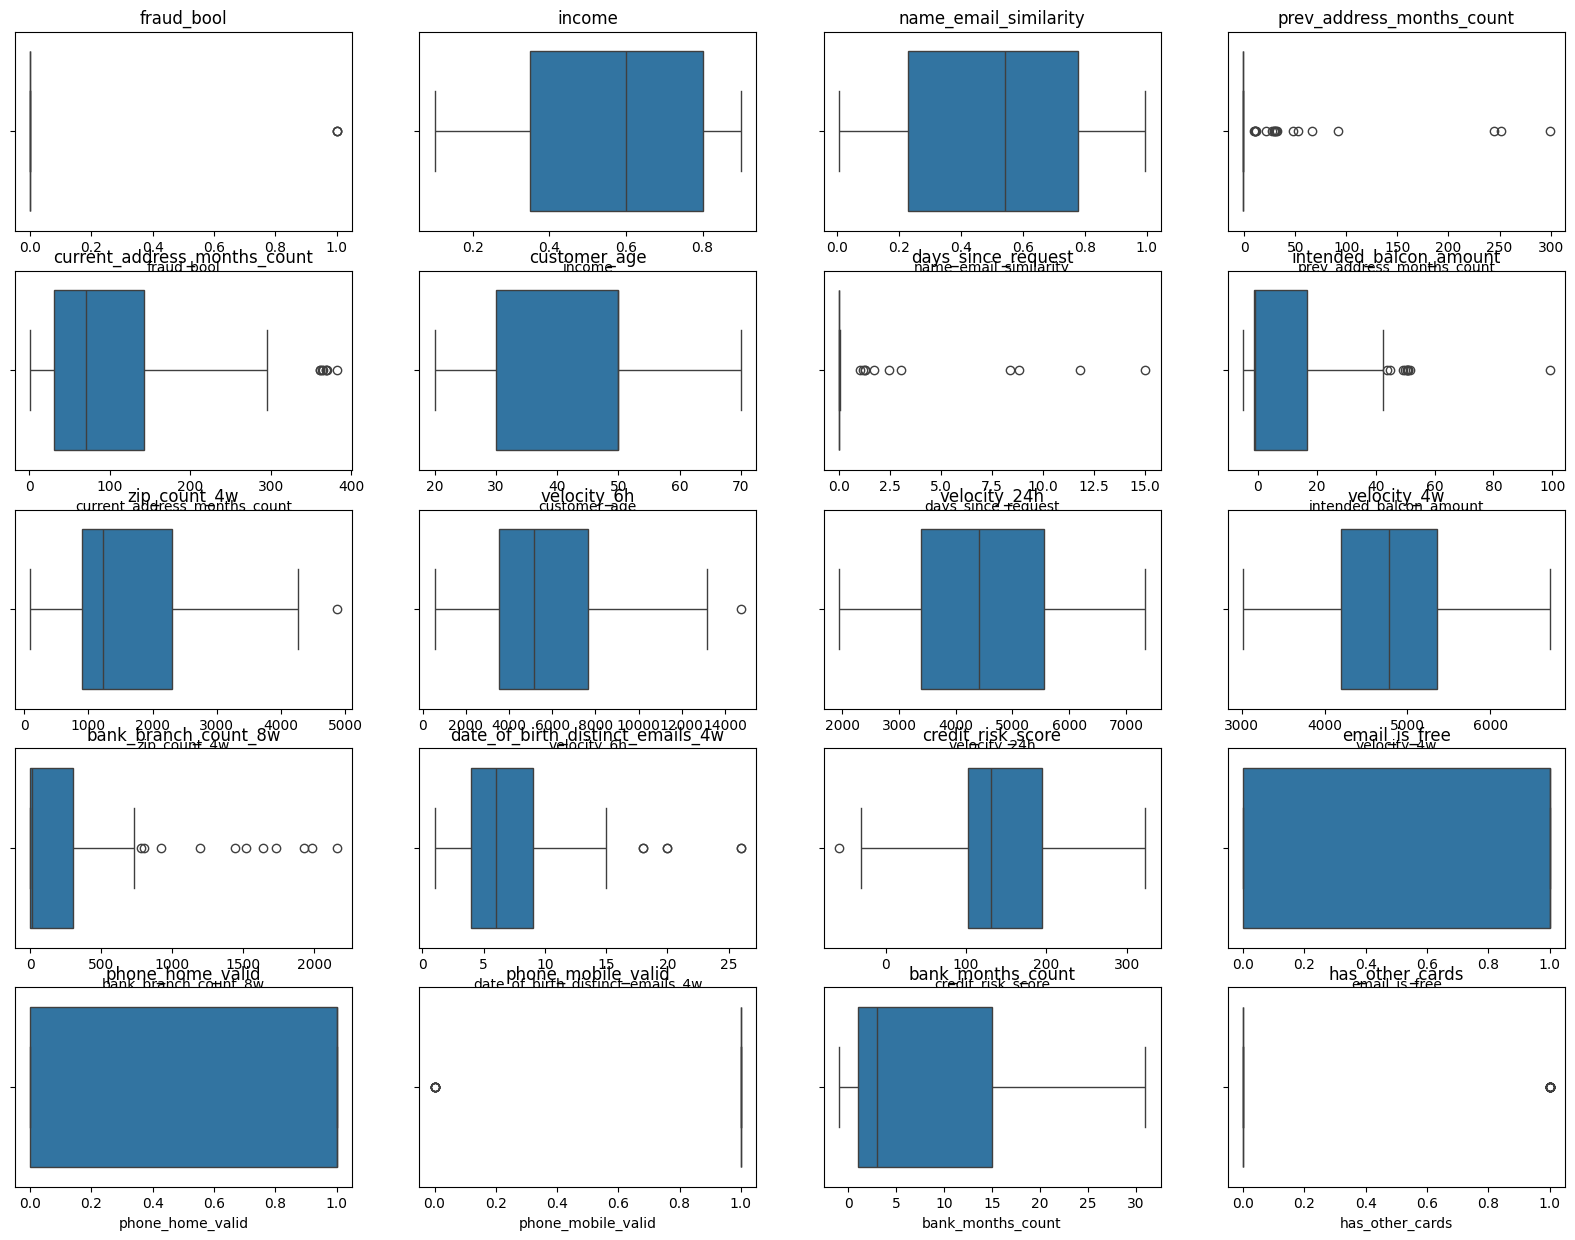

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# List of numerical columns (adjust based on your dataset)
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Detect and display outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers[[column]])
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")
        print("-------------------------")
    else:
        print(f"No outliers detected in {column}")
        print("-------------------------")

# Optional: Visualize outliers using box plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


Outlier Analysis for fraud_bool:
Number of outliers: 3
Percentage of outliers: 3.30%
Sample of outliers:
    fraud_bool
5            1
7            1
26           1

Generating plots...


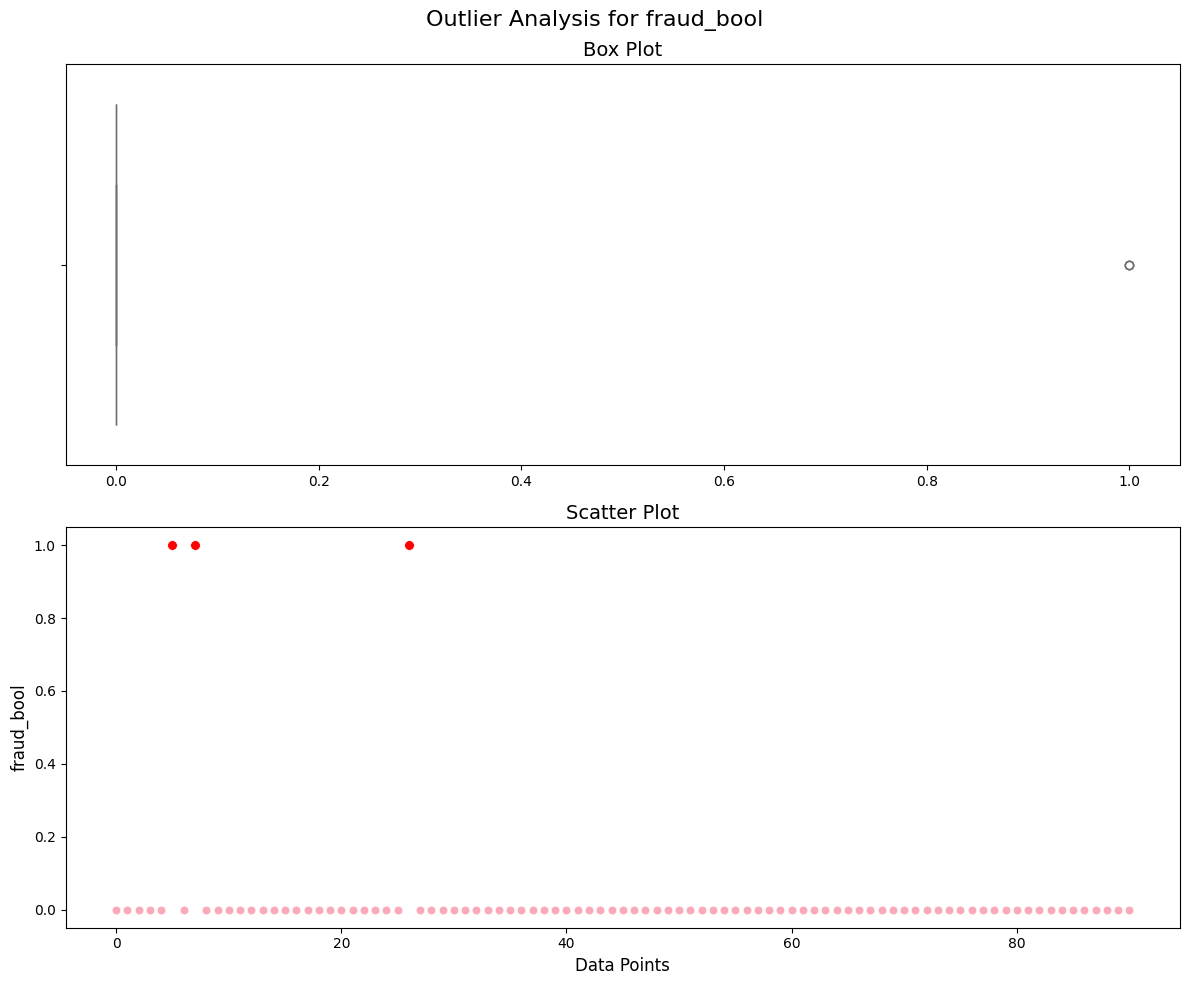

-------------------------

Outlier Analysis for income:
No outliers detected

Generating plots...


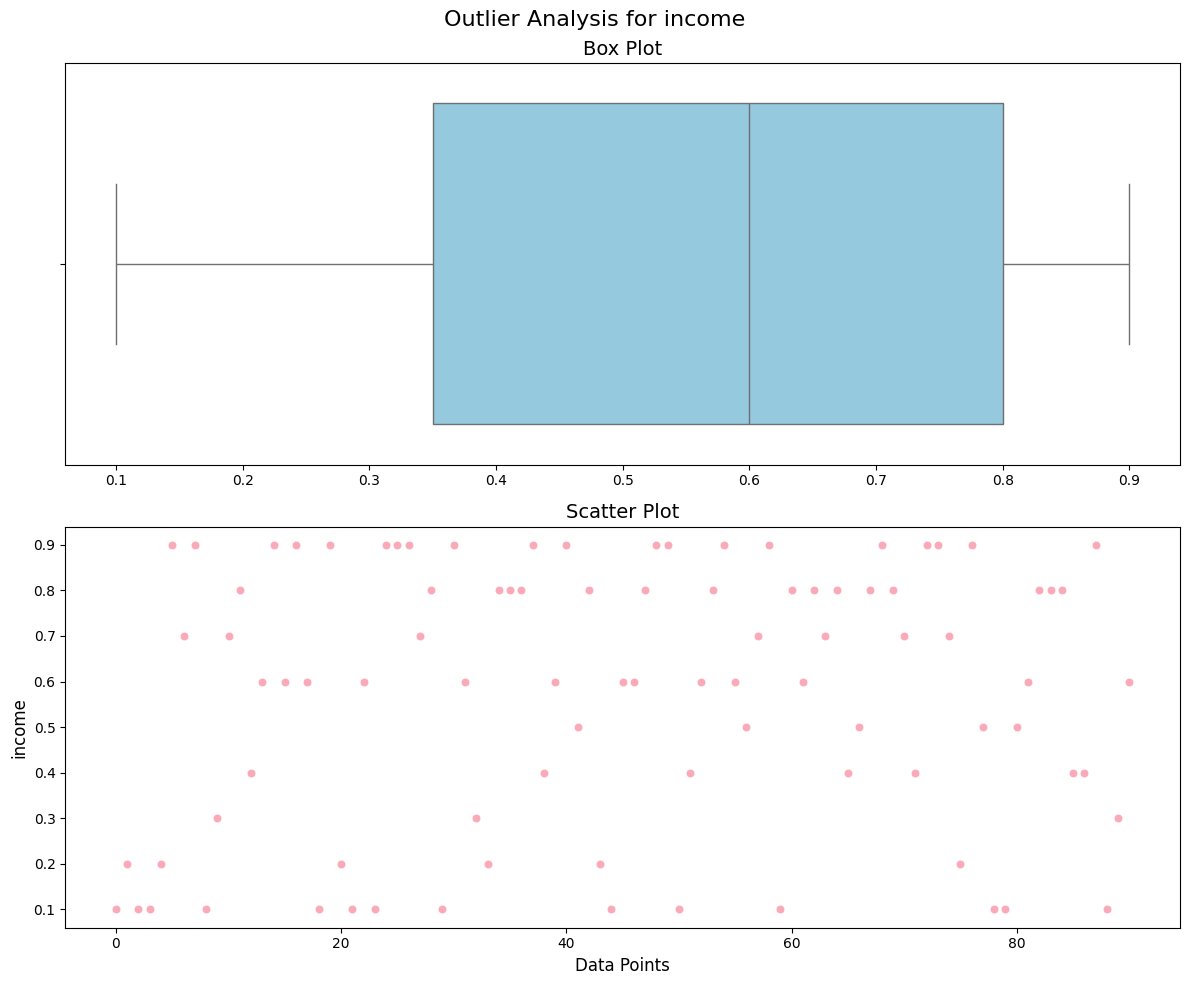

-------------------------

Outlier Analysis for name_email_similarity:
No outliers detected

Generating plots...


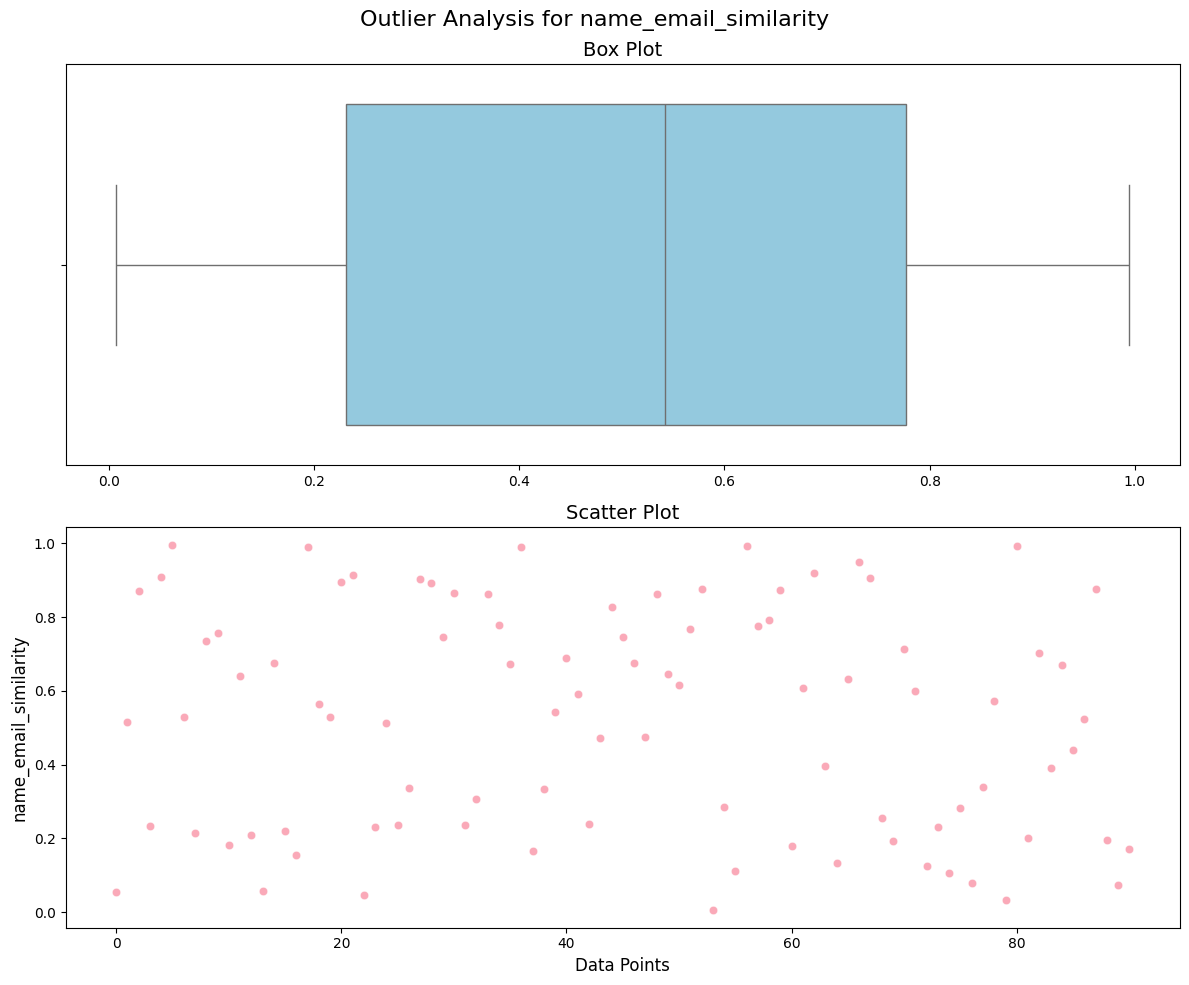

-------------------------

Outlier Analysis for prev_address_months_count:
Number of outliers: 19
Percentage of outliers: 20.88%
Sample of outliers:
    prev_address_months_count
3                          29
4                          11
8                          11
9                          48
13                         12

Generating plots...


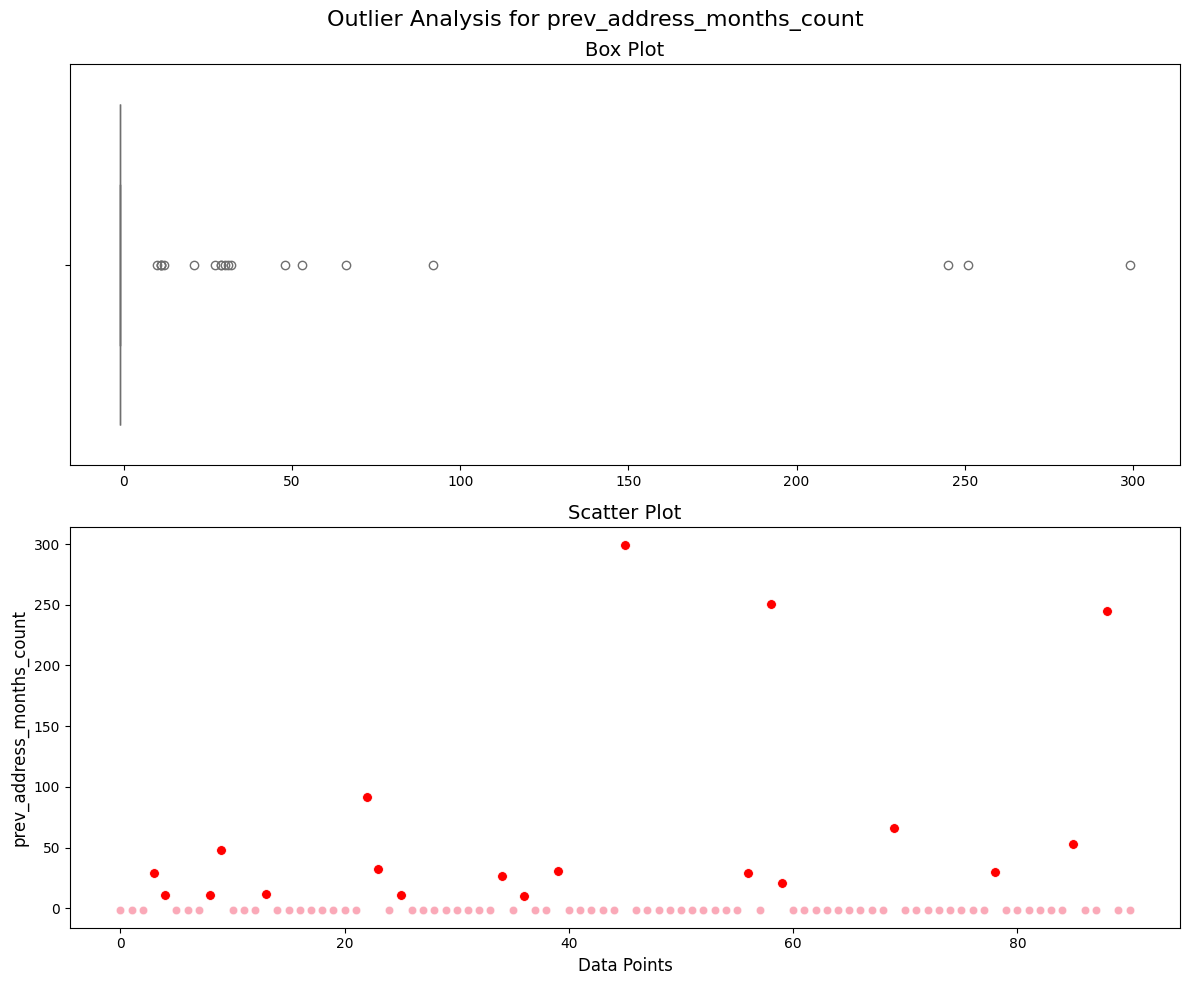

-------------------------

Outlier Analysis for current_address_months_count:
Number of outliers: 8
Percentage of outliers: 8.79%
Sample of outliers:
    current_address_months_count
17                           382
20                           364
21                           369
35                           361
57                           362

Generating plots...


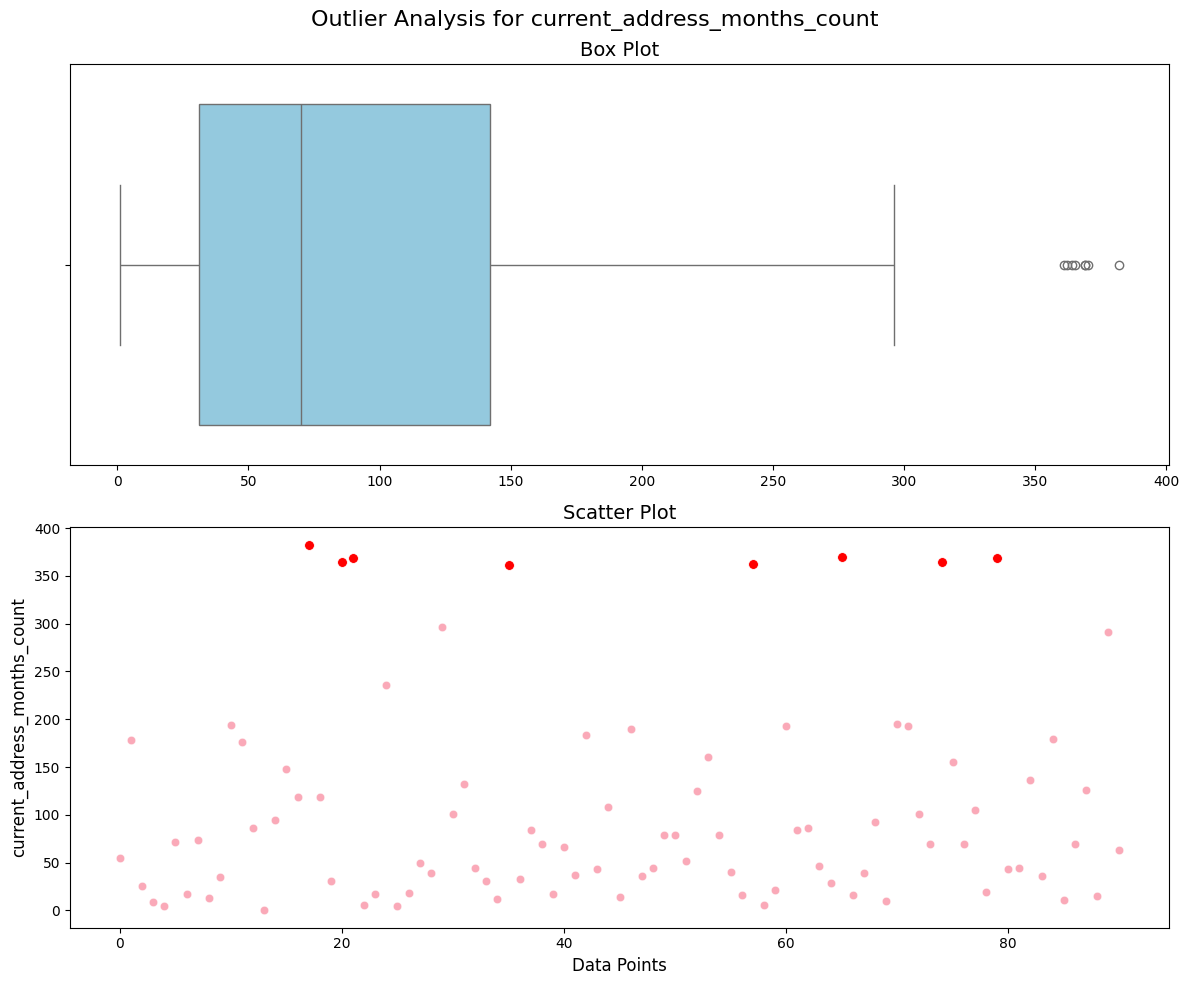

-------------------------

Outlier Analysis for customer_age:
No outliers detected

Generating plots...


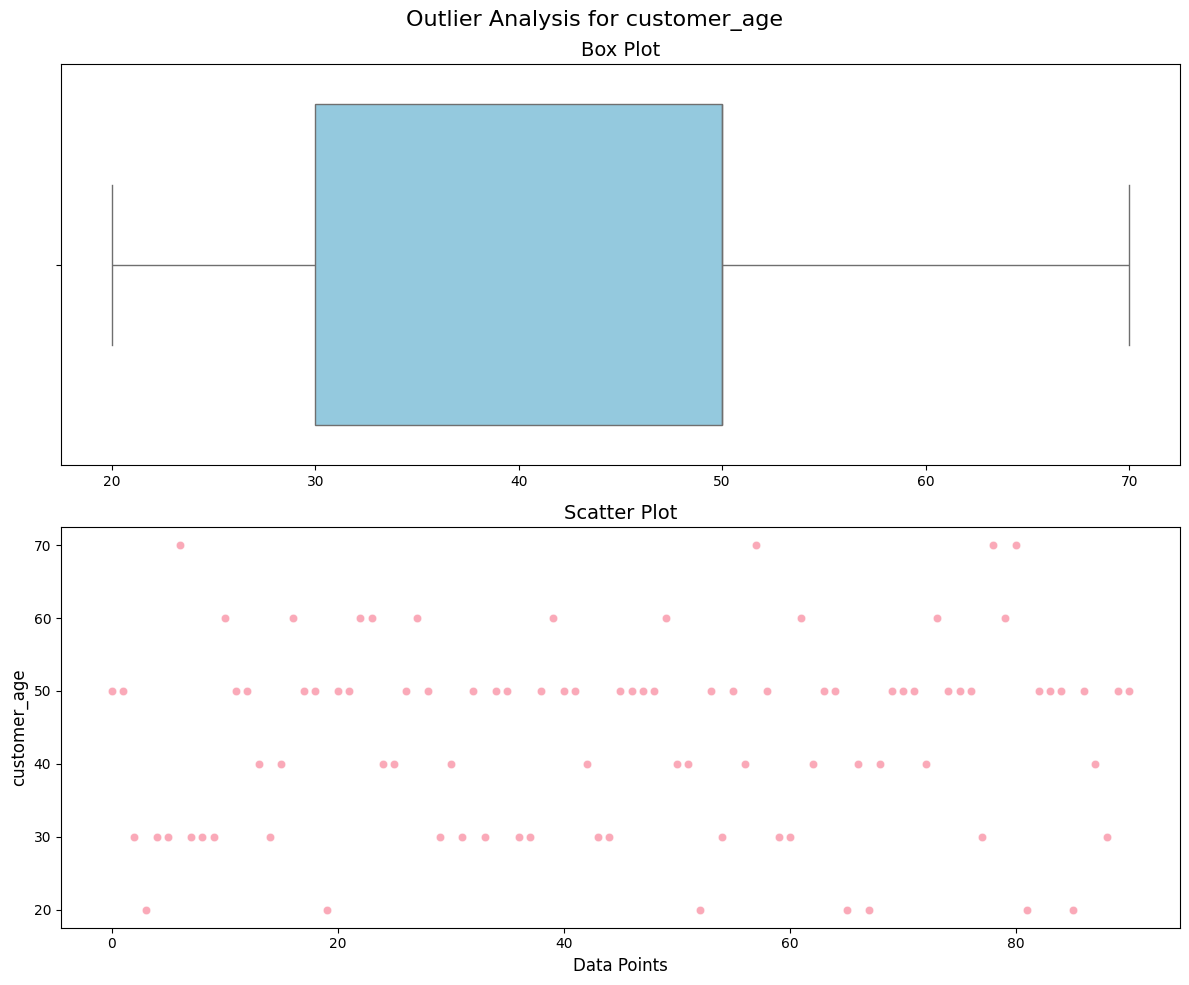

-------------------------

Outlier Analysis for days_since_request:
Number of outliers: 11
Percentage of outliers: 12.09%
Sample of outliers:
    days_since_request
2            11.838249
10            1.055308
21            1.174404
29            2.437399
35            1.735138

Generating plots...


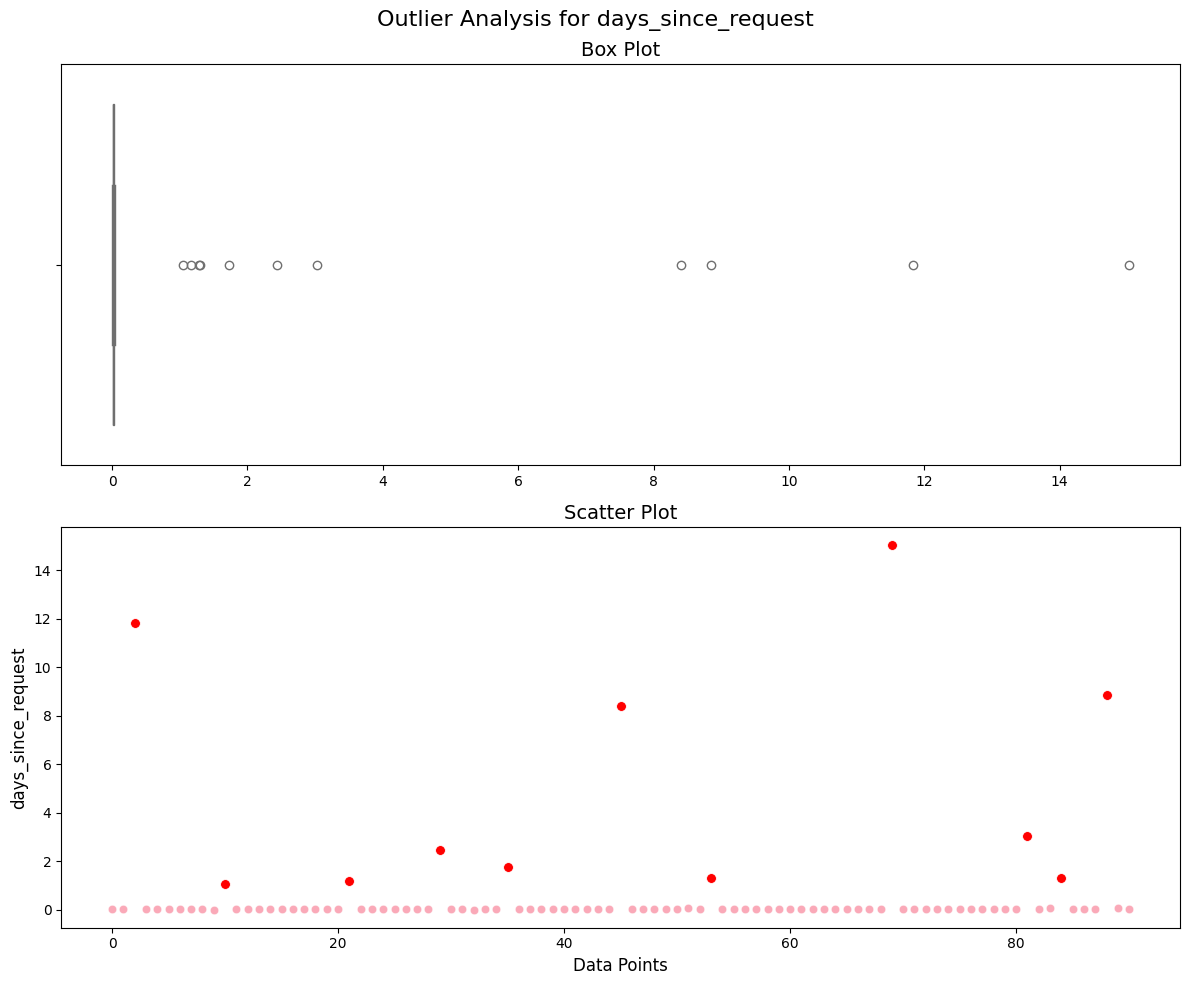

-------------------------

Outlier Analysis for intended_balcon_amount:
Number of outliers: 10
Percentage of outliers: 10.99%
Sample of outliers:
    intended_balcon_amount
2                51.068616
11               49.944323
25               51.613547
29               49.138628
35               51.039381

Generating plots...


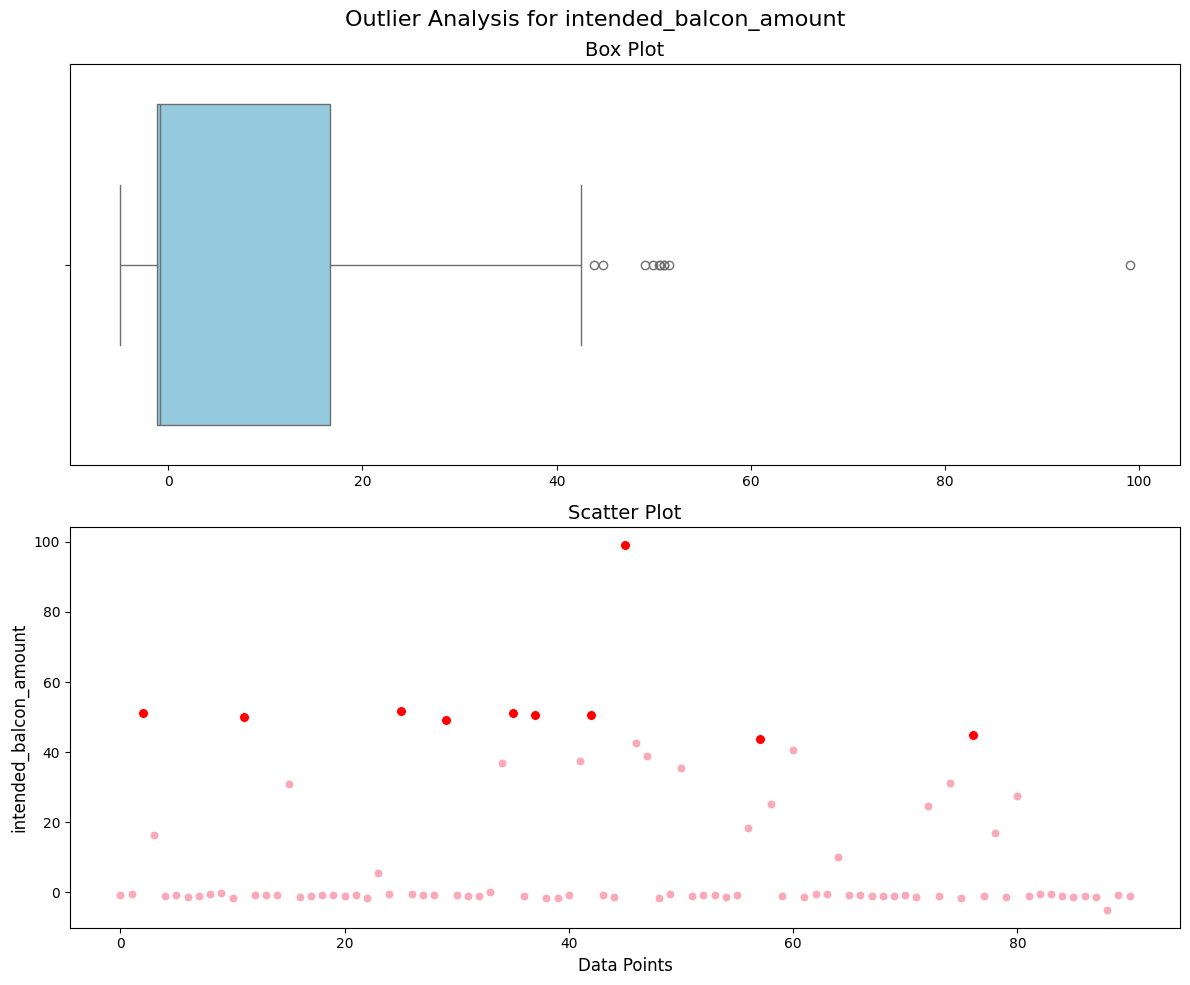

-------------------------

Outlier Analysis for zip_count_4w:
Number of outliers: 1
Percentage of outliers: 1.10%
Sample of outliers:
    zip_count_4w
46          4865

Generating plots...


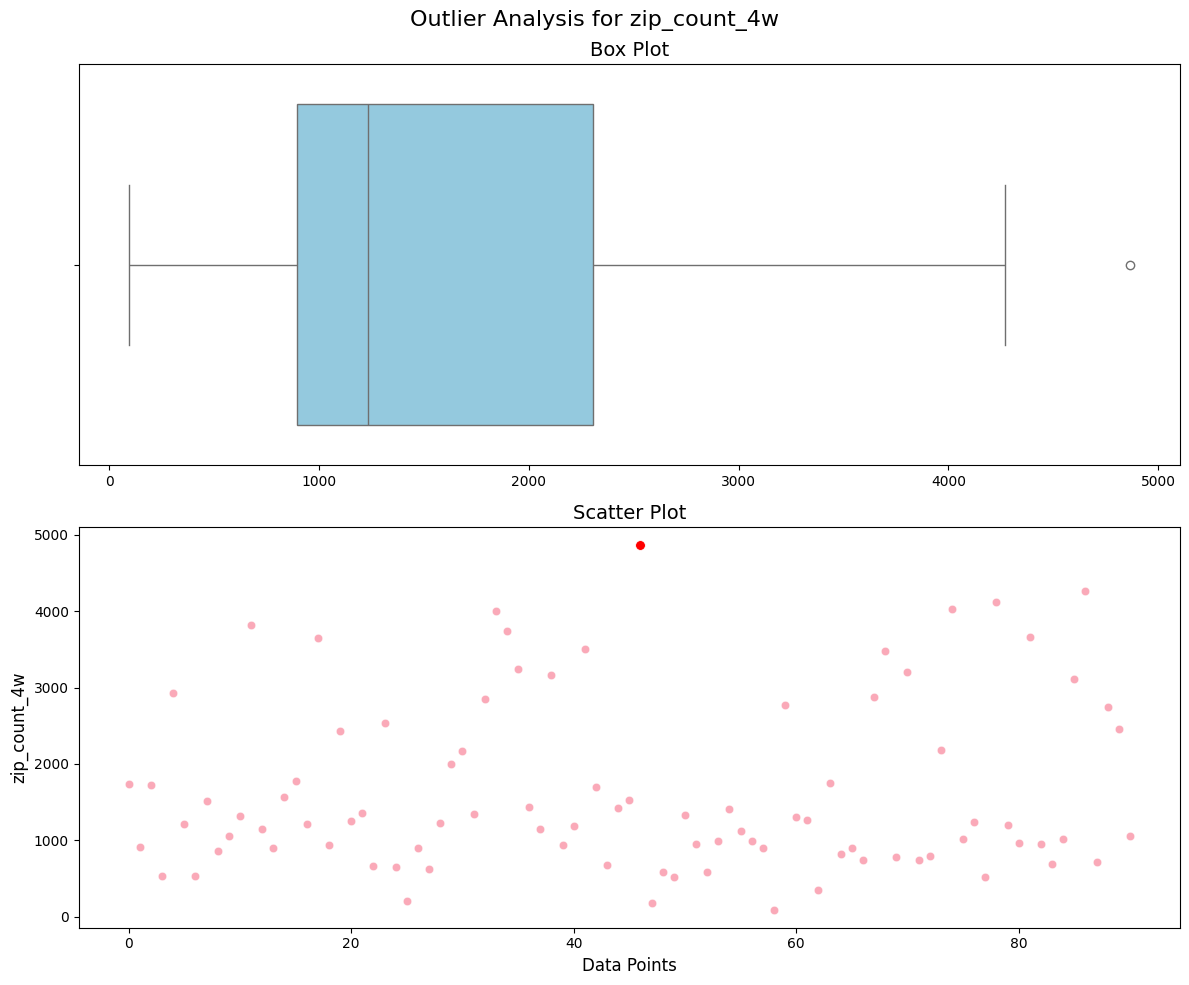

-------------------------

Outlier Analysis for velocity_6h:
Number of outliers: 1
Percentage of outliers: 1.10%
Sample of outliers:
     velocity_6h
89  14734.852395

Generating plots...


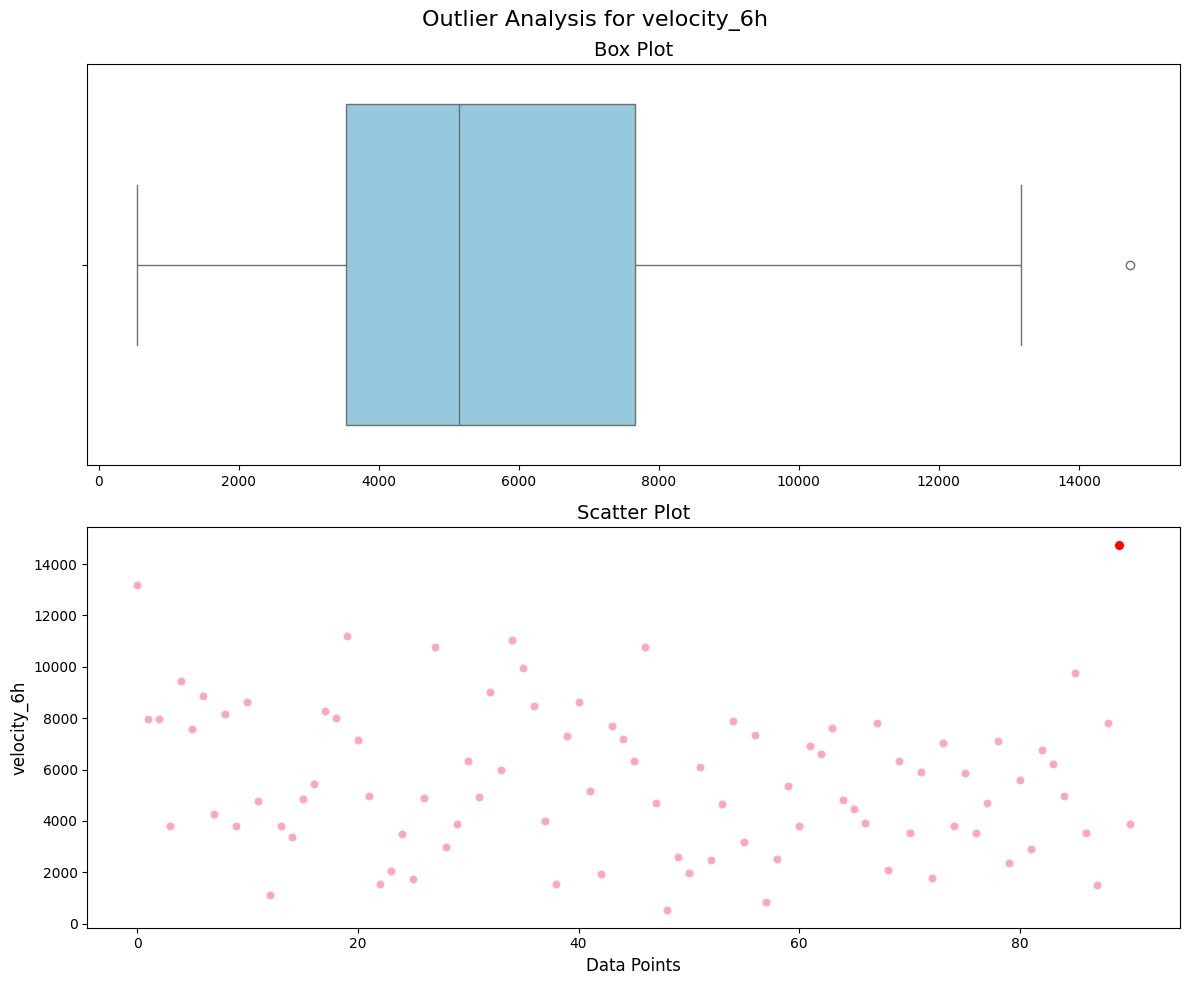

-------------------------

Outlier Analysis for velocity_24h:
No outliers detected

Generating plots...


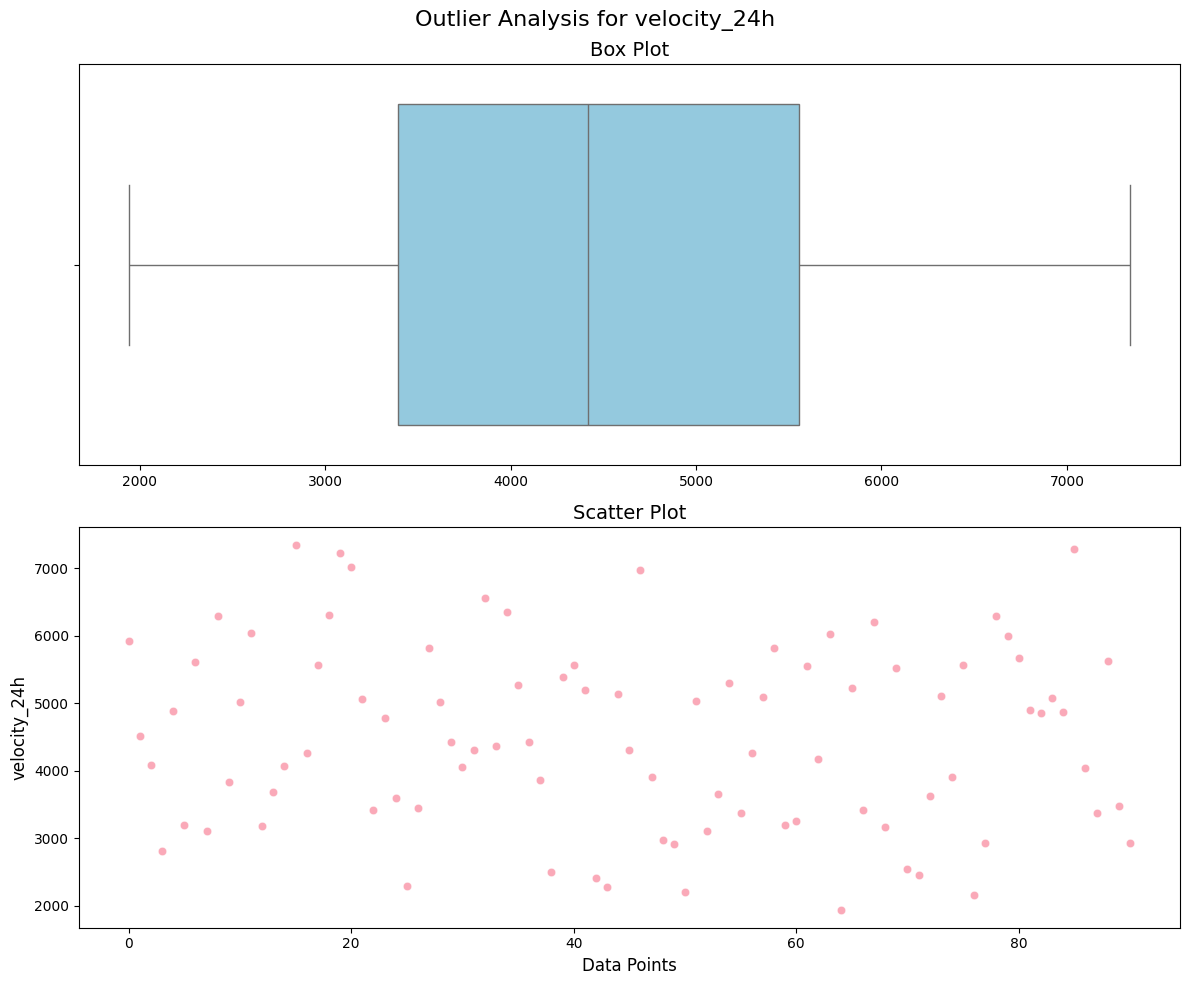

-------------------------

Outlier Analysis for velocity_4w:
No outliers detected

Generating plots...


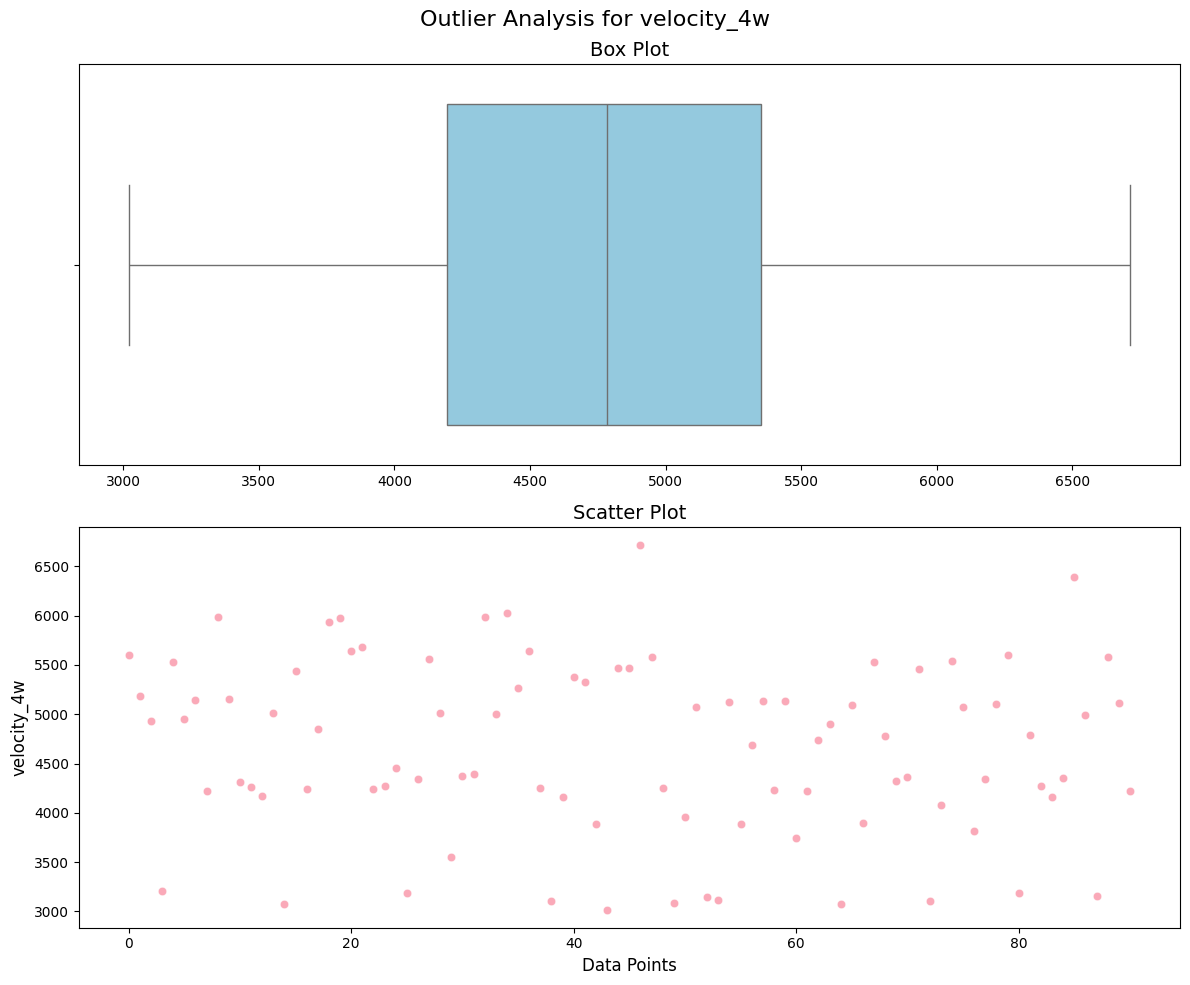

-------------------------

Outlier Analysis for bank_branch_count_8w:
Number of outliers: 11
Percentage of outliers: 12.09%
Sample of outliers:
    bank_branch_count_8w
22                   922
29                  1986
32                  1520
35                  2156
38                  1730

Generating plots...


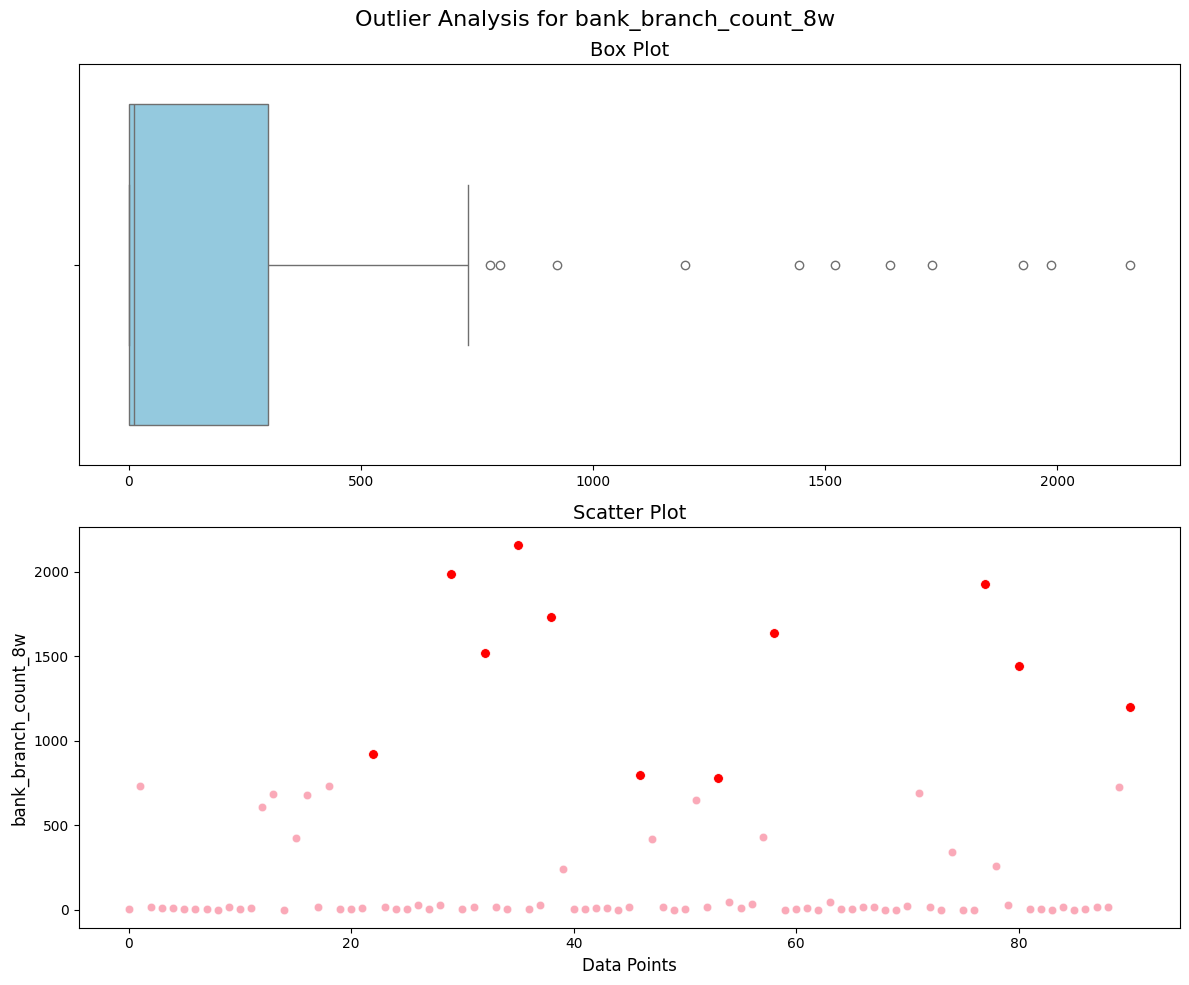

-------------------------

Outlier Analysis for date_of_birth_distinct_emails_4w:
Number of outliers: 6
Percentage of outliers: 6.59%
Sample of outliers:
    date_of_birth_distinct_emails_4w
5                                 18
9                                 26
13                                20
19                                26
44                                18

Generating plots...


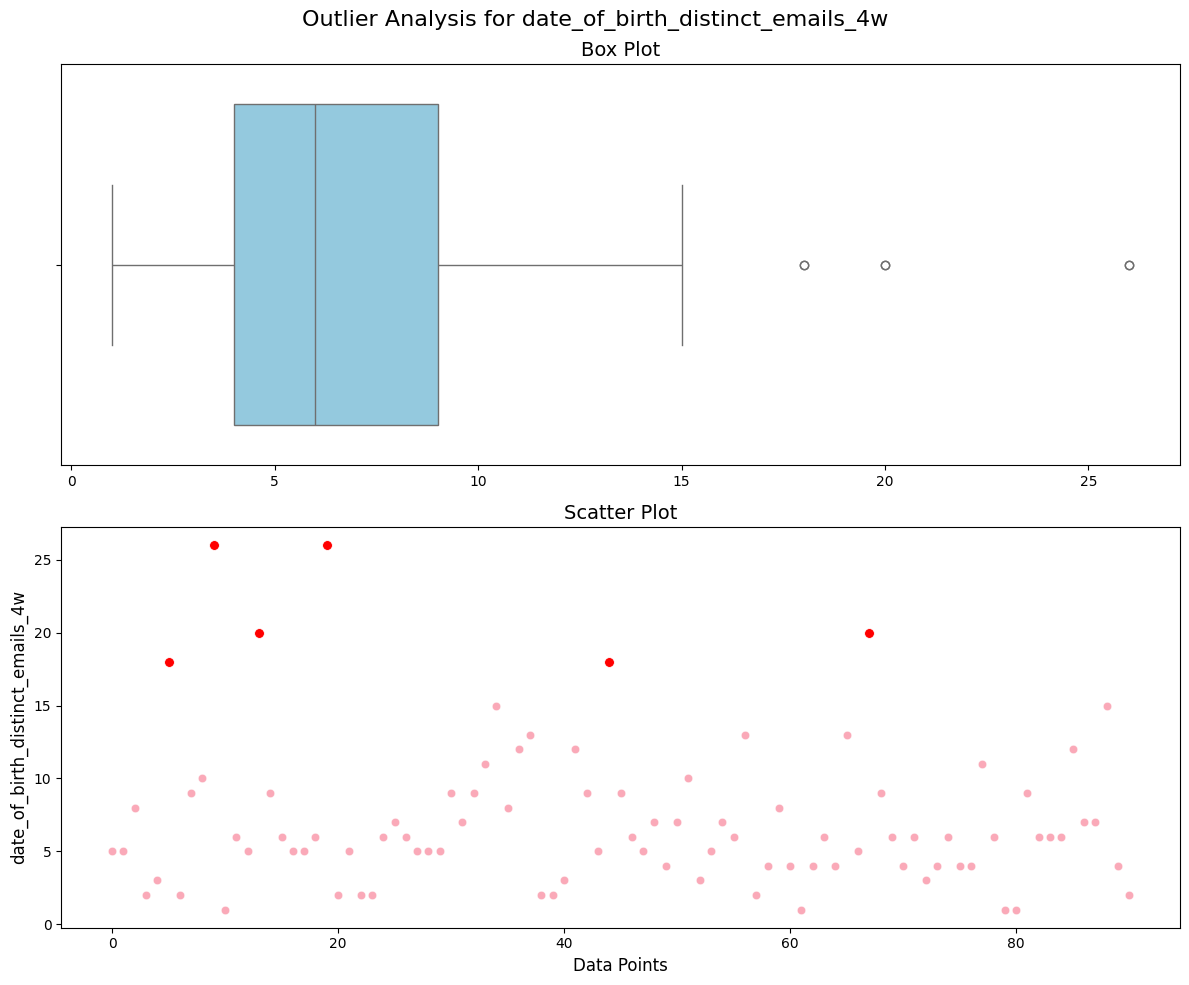

-------------------------

Outlier Analysis for credit_risk_score:
Number of outliers: 1
Percentage of outliers: 1.10%
Sample of outliers:
    credit_risk_score
56                -58

Generating plots...


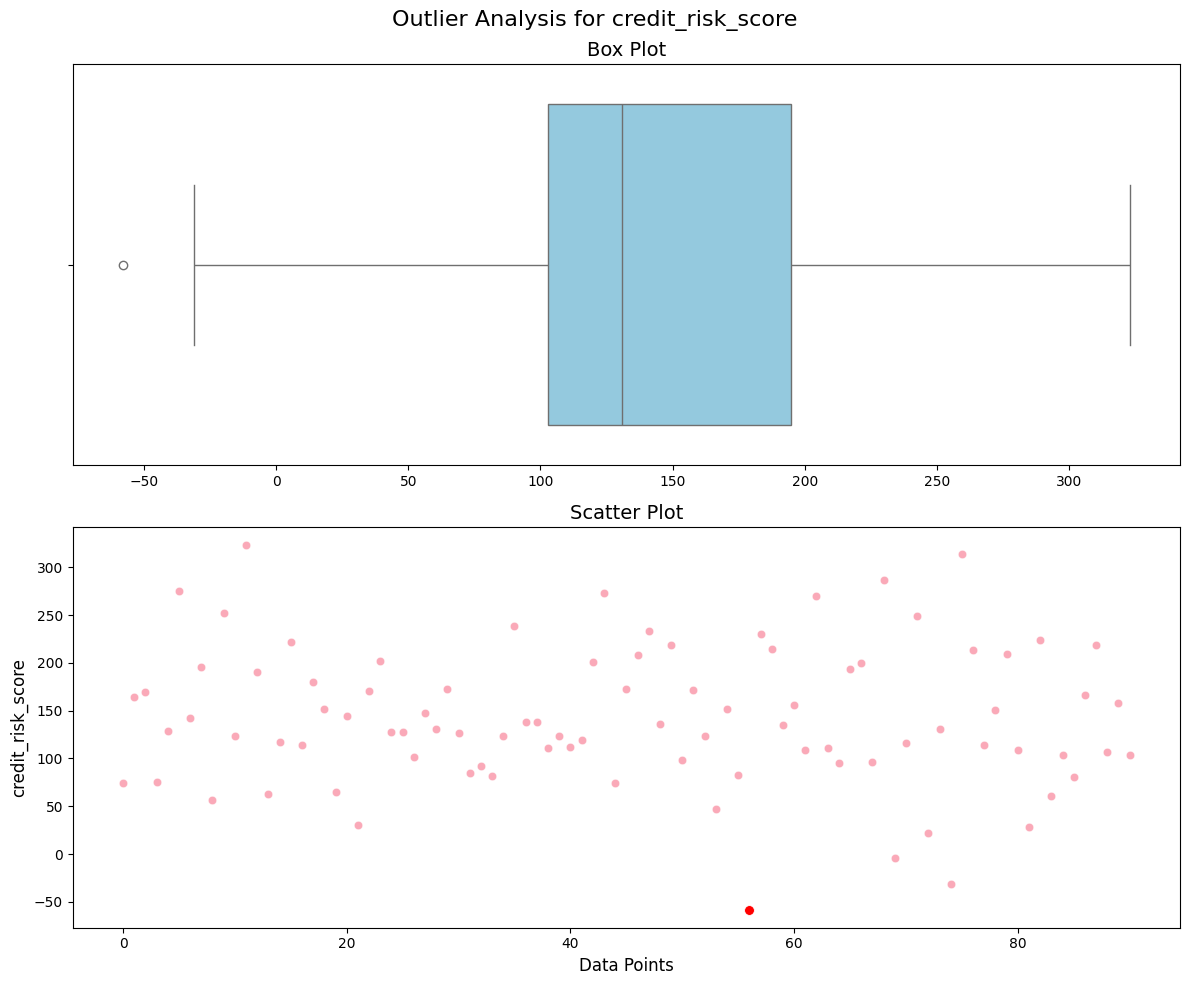

-------------------------

Outlier Analysis for email_is_free:
No outliers detected

Generating plots...


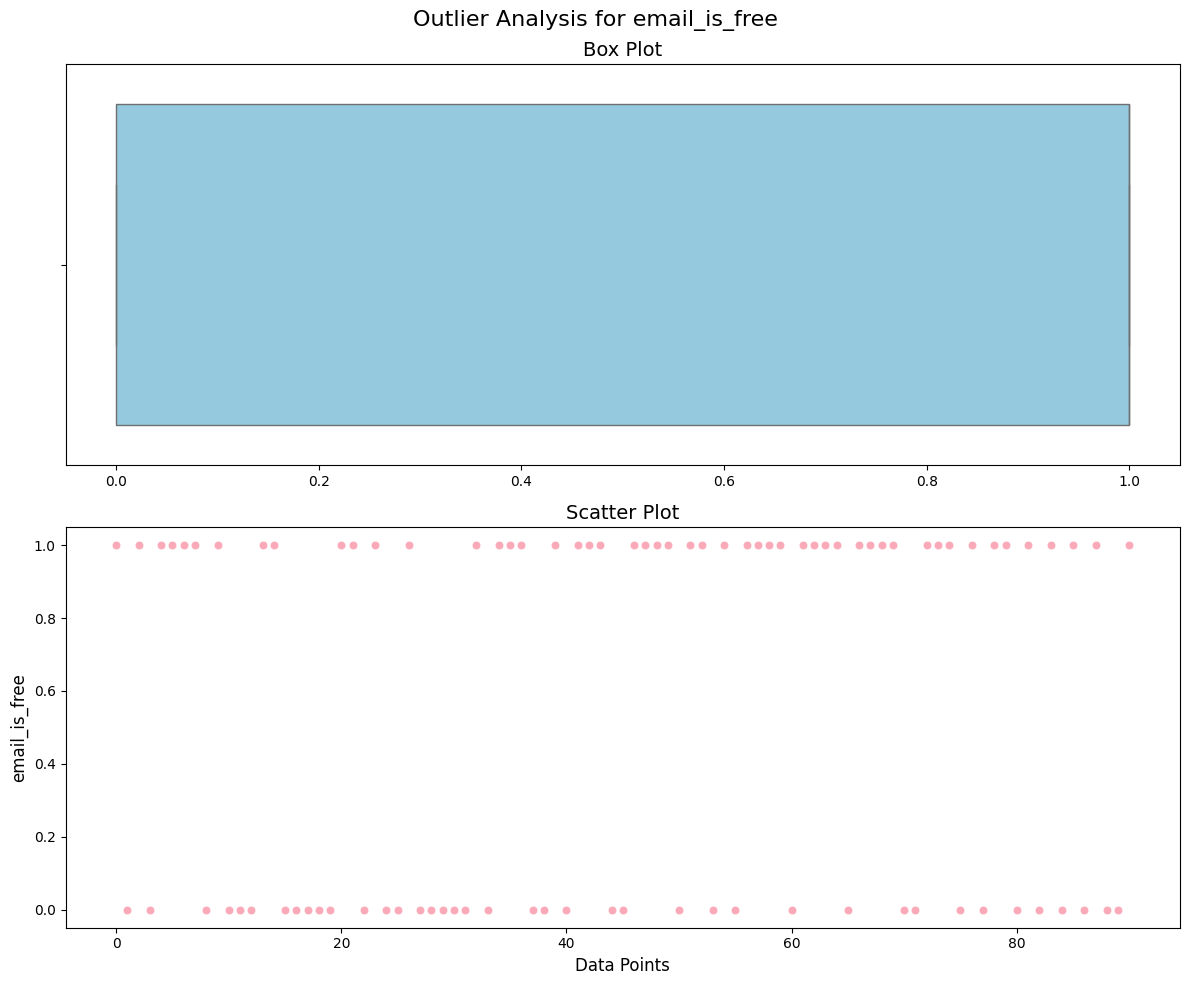

-------------------------

Outlier Analysis for phone_home_valid:
No outliers detected

Generating plots...


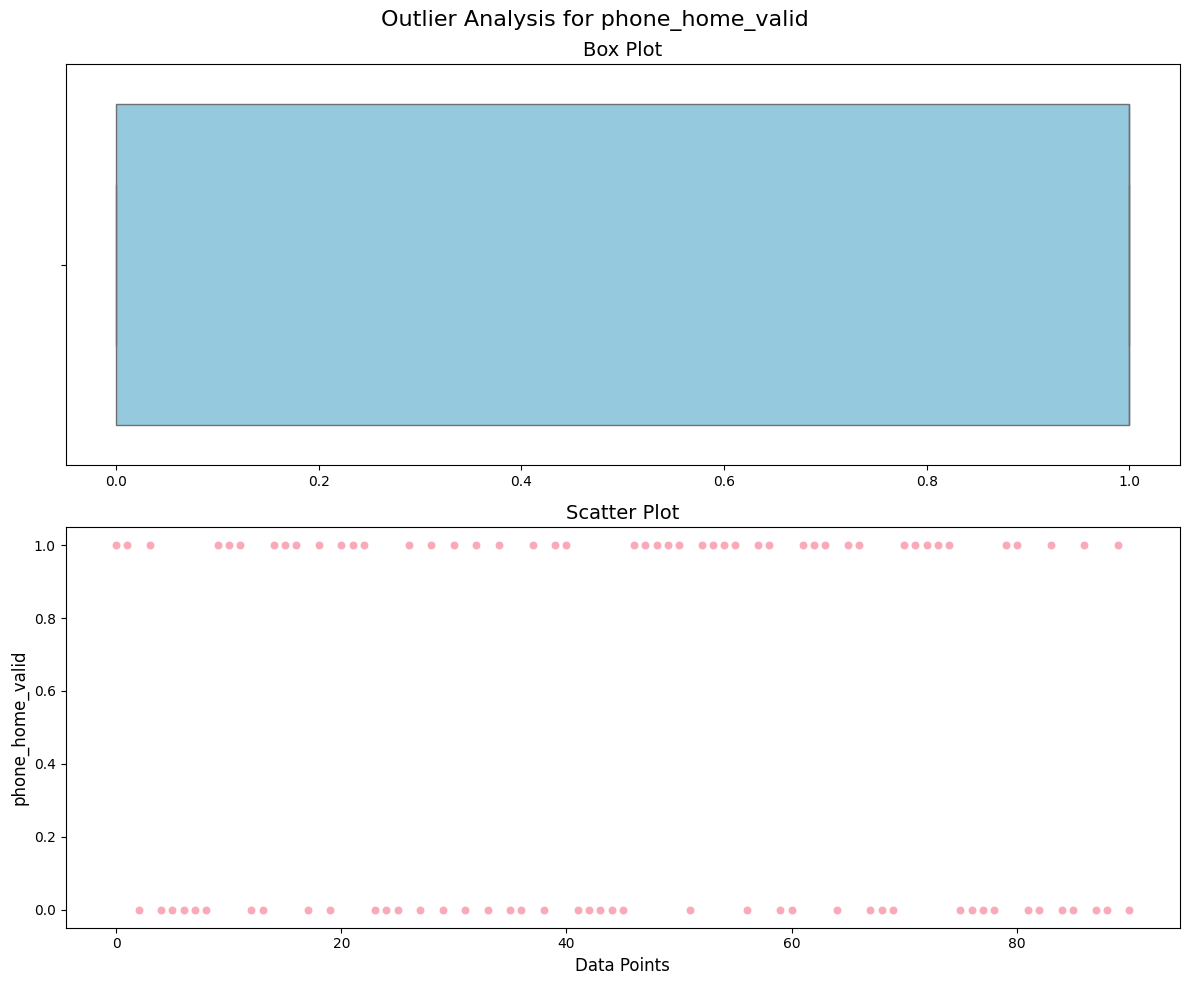

-------------------------

Outlier Analysis for phone_mobile_valid:
Number of outliers: 8
Percentage of outliers: 8.79%
Sample of outliers:
    phone_mobile_valid
16                   0
21                   0
28                   0
49                   0
61                   0

Generating plots...


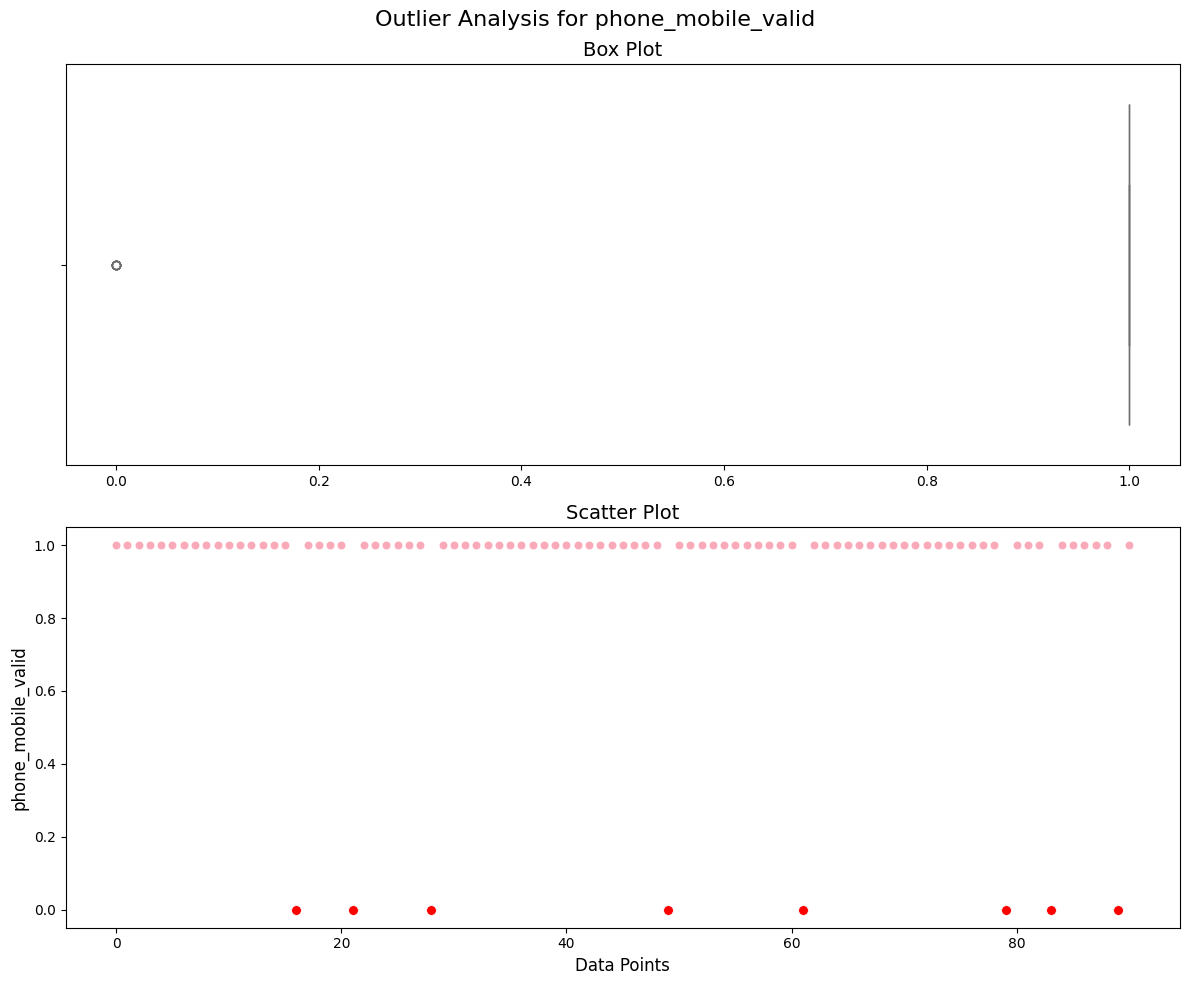

-------------------------

Outlier Analysis for bank_months_count:
No outliers detected

Generating plots...


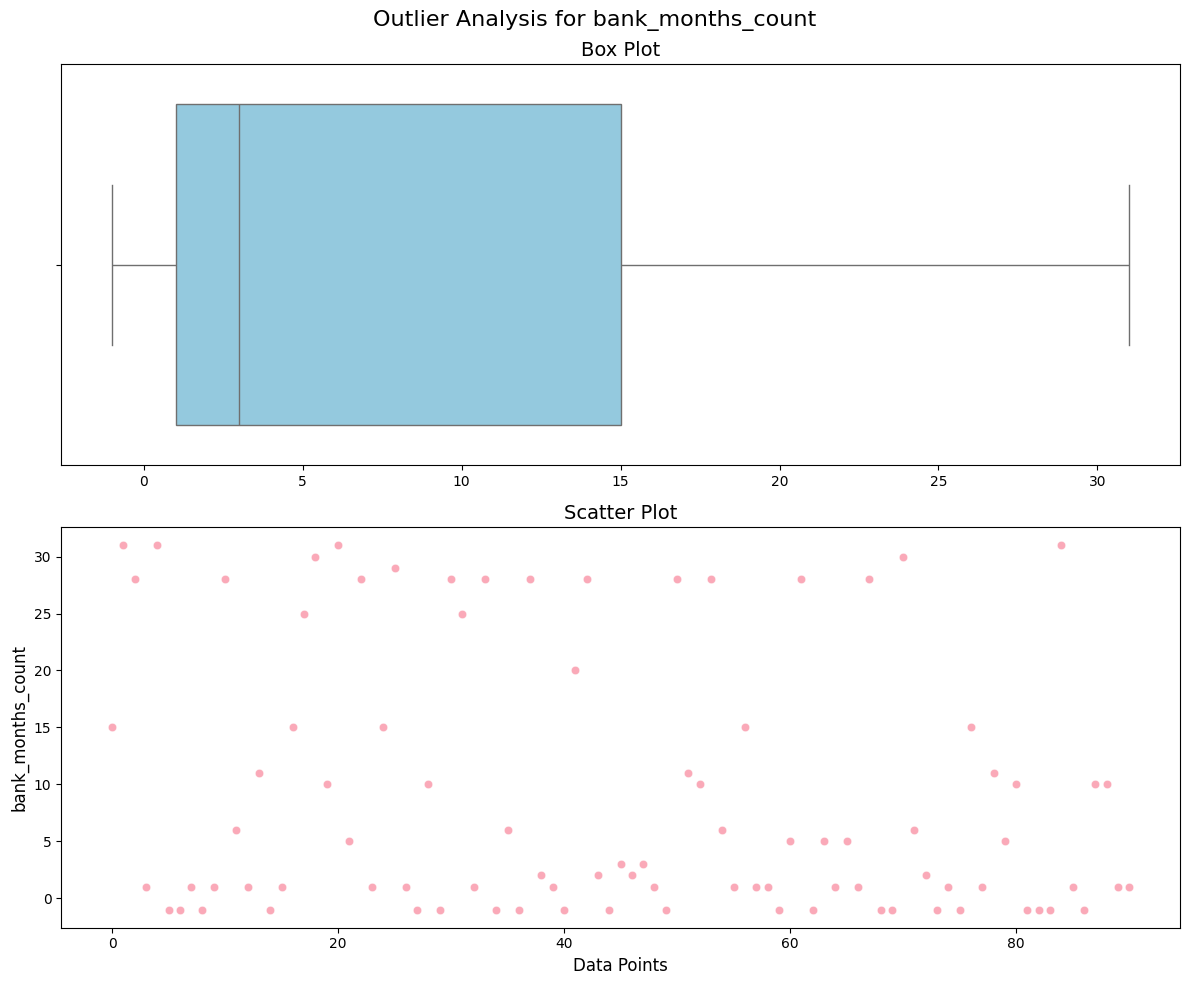

-------------------------

Outlier Analysis for has_other_cards:
Number of outliers: 19
Percentage of outliers: 20.88%
Sample of outliers:
    has_other_cards
2                 1
4                 1
9                 1
17                1
24                1

Generating plots...


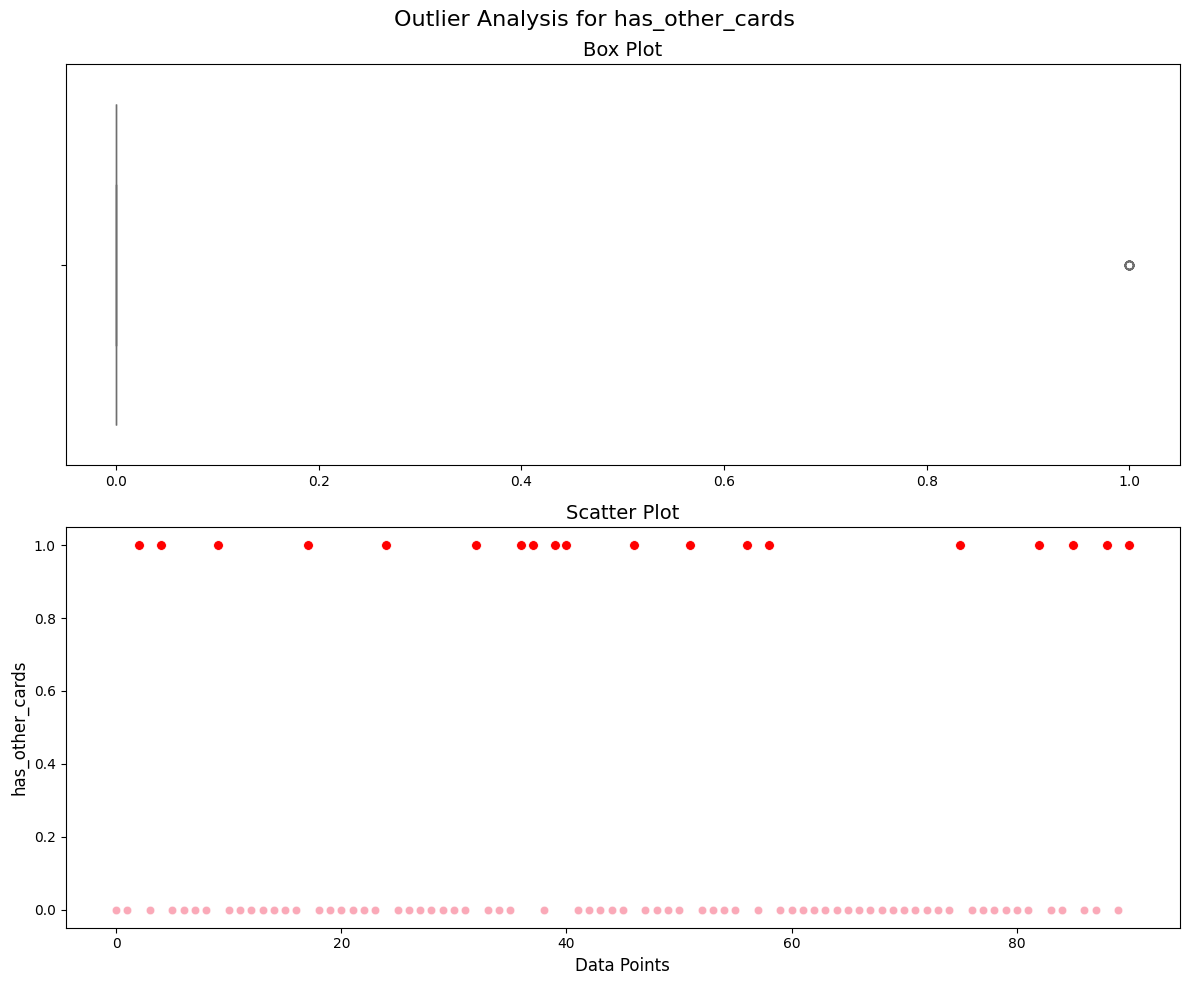

-------------------------

Outlier Analysis for proposed_credit_limit:
No outliers detected

Generating plots...


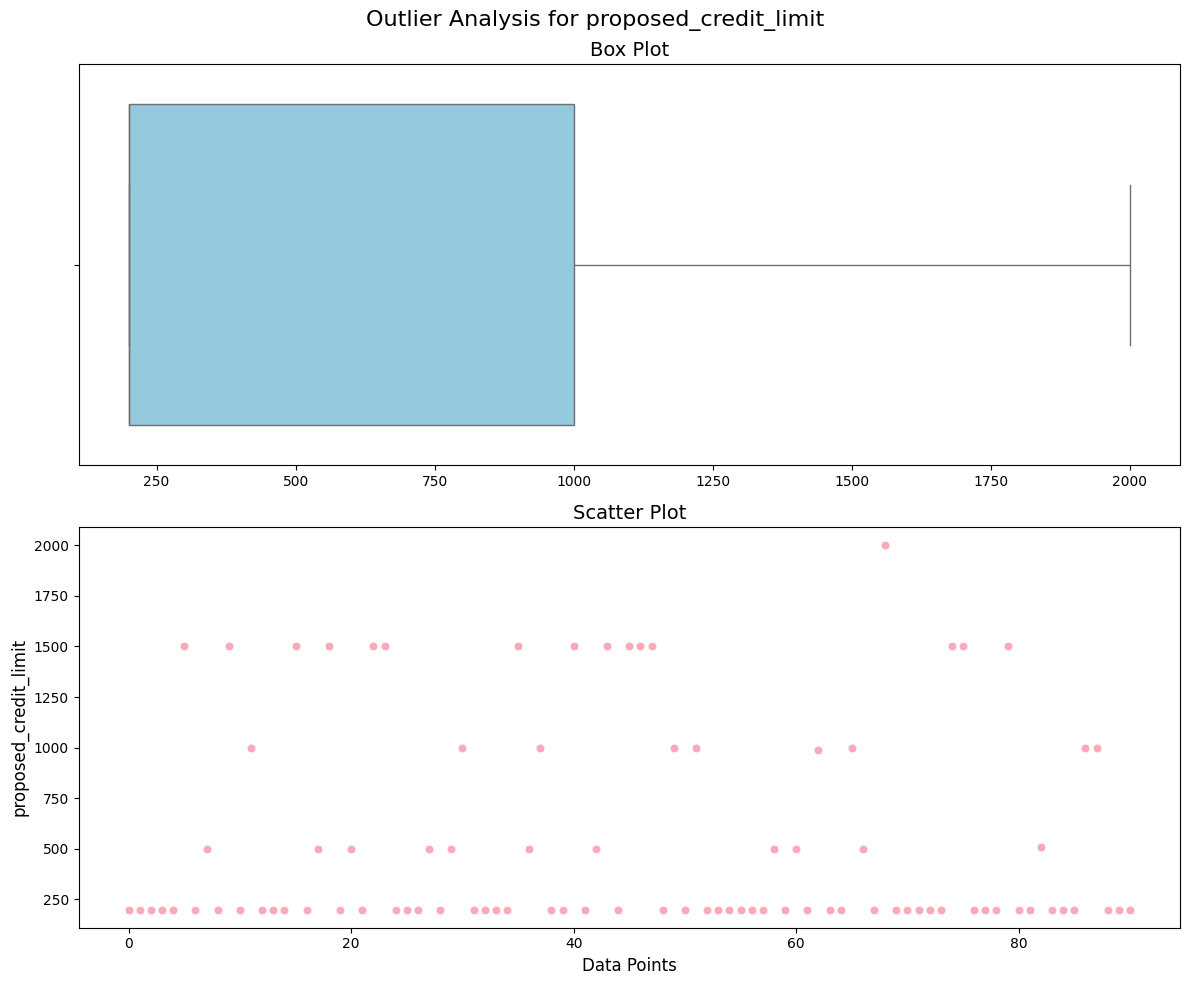

-------------------------

Outlier Analysis for foreign_request:
Number of outliers: 1
Percentage of outliers: 1.10%
Sample of outliers:
    foreign_request
64                1

Generating plots...


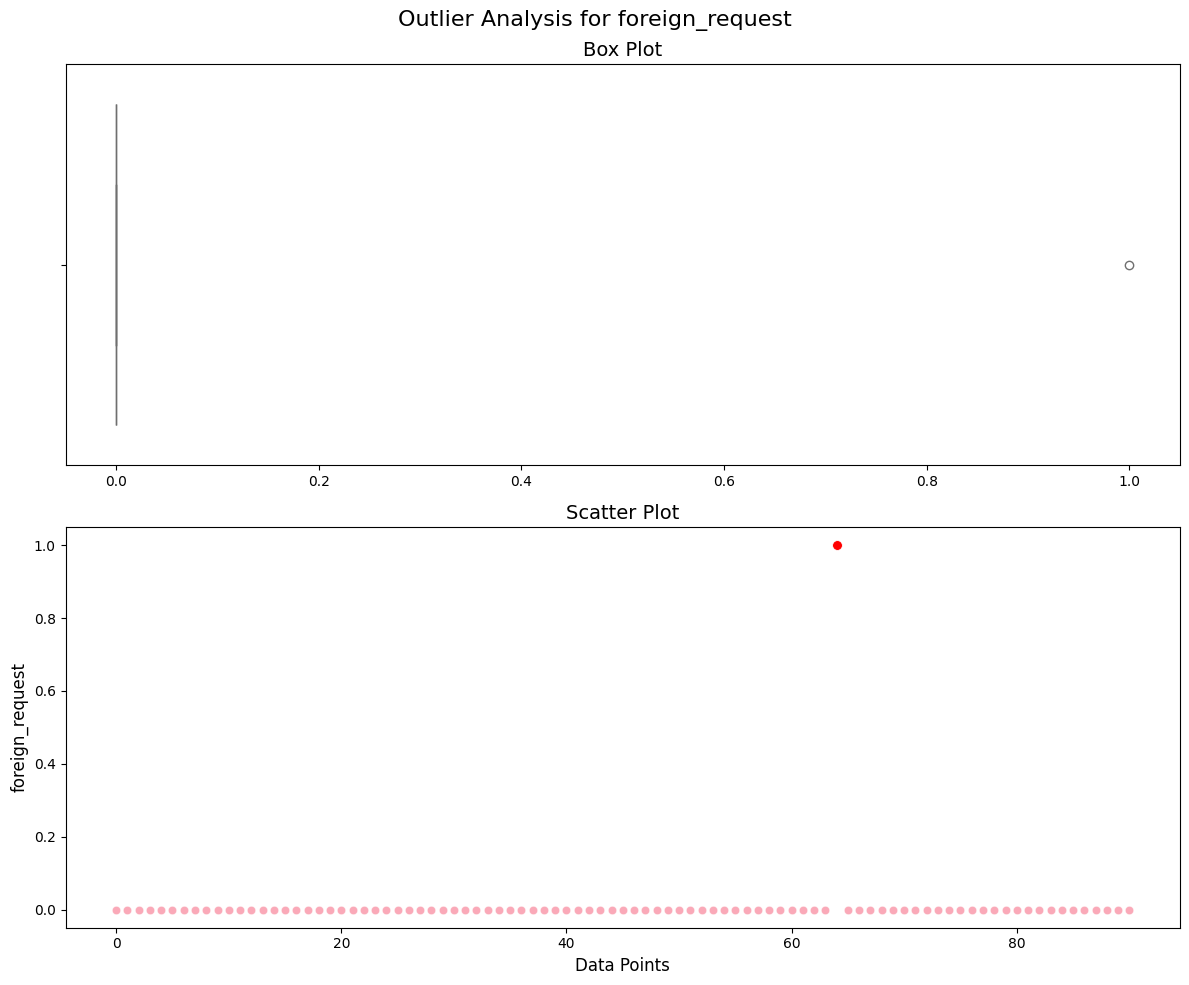

-------------------------

Outlier Analysis for session_length_in_minutes:
Number of outliers: 5
Percentage of outliers: 5.49%
Sample of outliers:
    session_length_in_minutes
21                  27.643383
27                  24.672547
35                  23.059914
44                  41.852330
63                  21.399952

Generating plots...


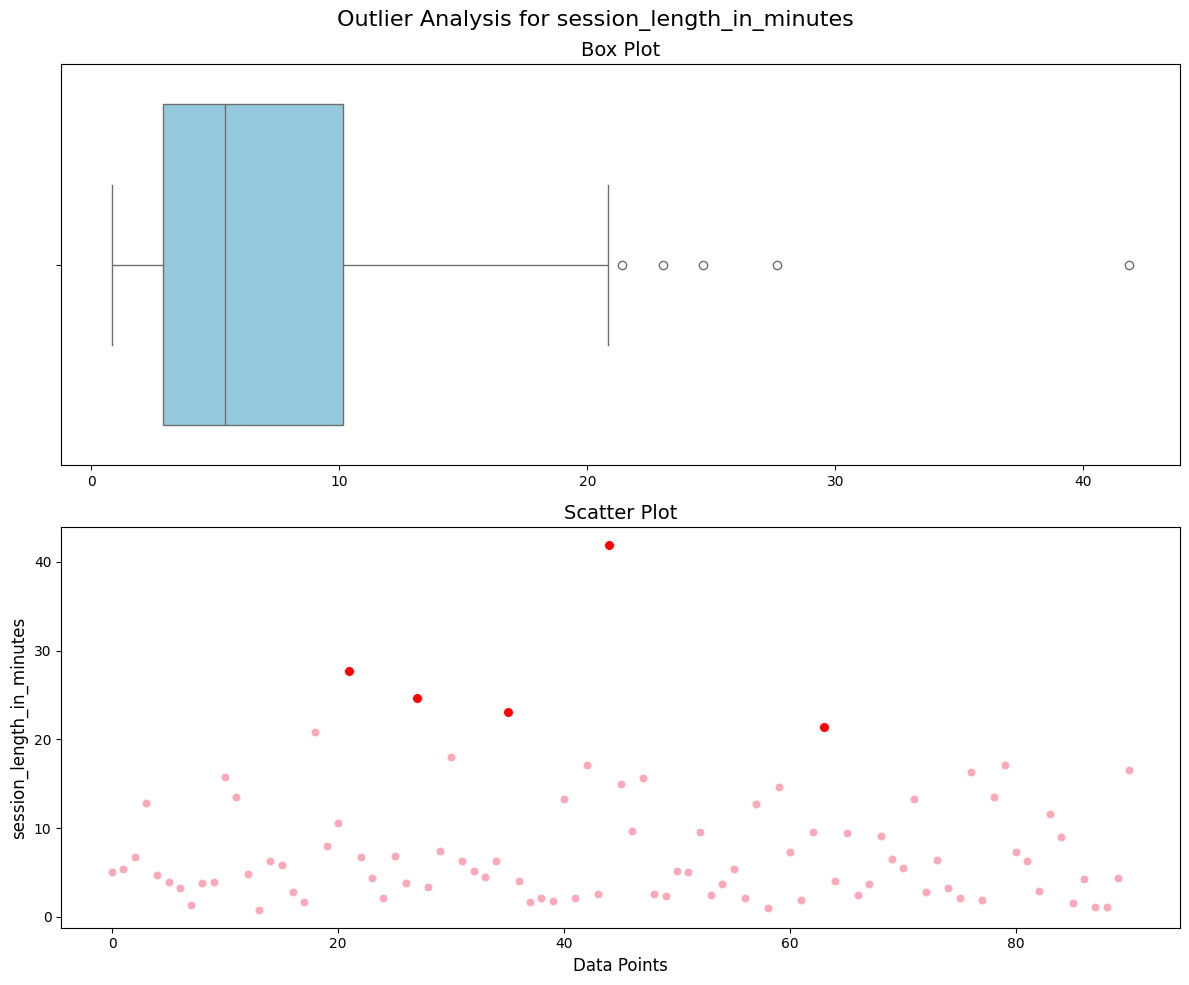

-------------------------

Outlier Analysis for keep_alive_session:
No outliers detected

Generating plots...


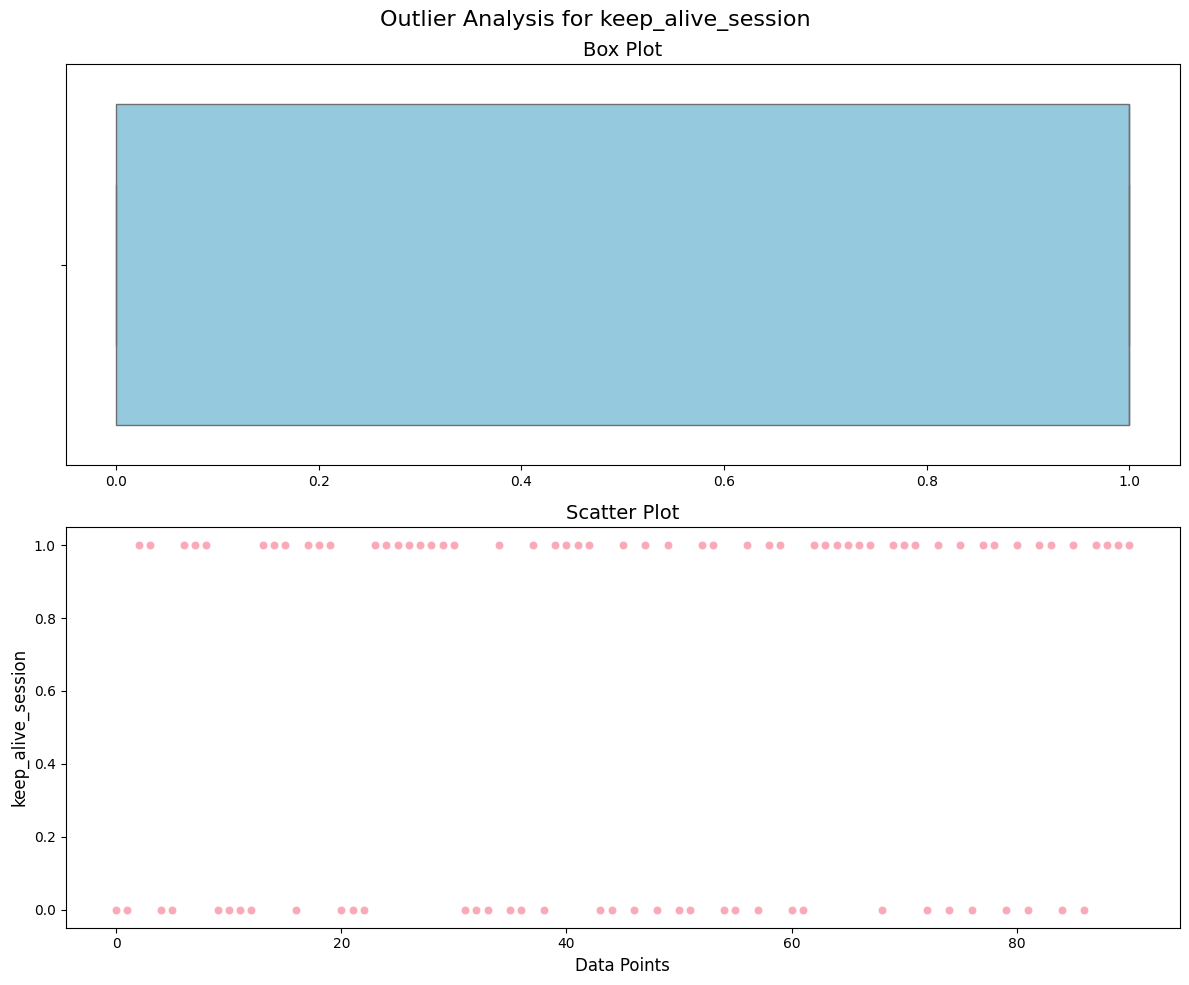

-------------------------

Outlier Analysis for device_distinct_emails_8w:
Number of outliers: 1
Percentage of outliers: 1.10%
Sample of outliers:
    device_distinct_emails_8w
33                          2

Generating plots...


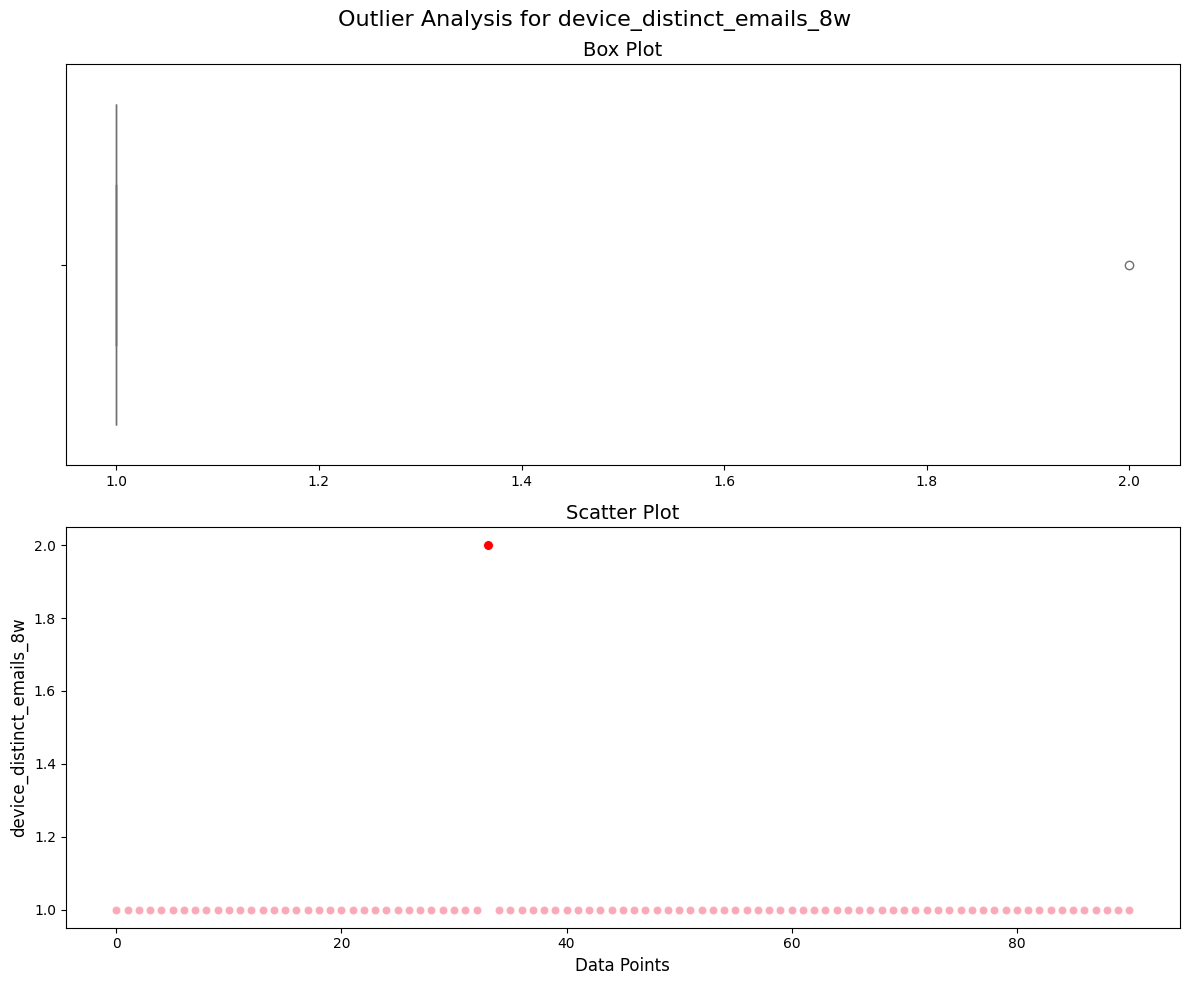

-------------------------

Outlier Analysis for device_fraud_count:
No outliers detected

Generating plots...


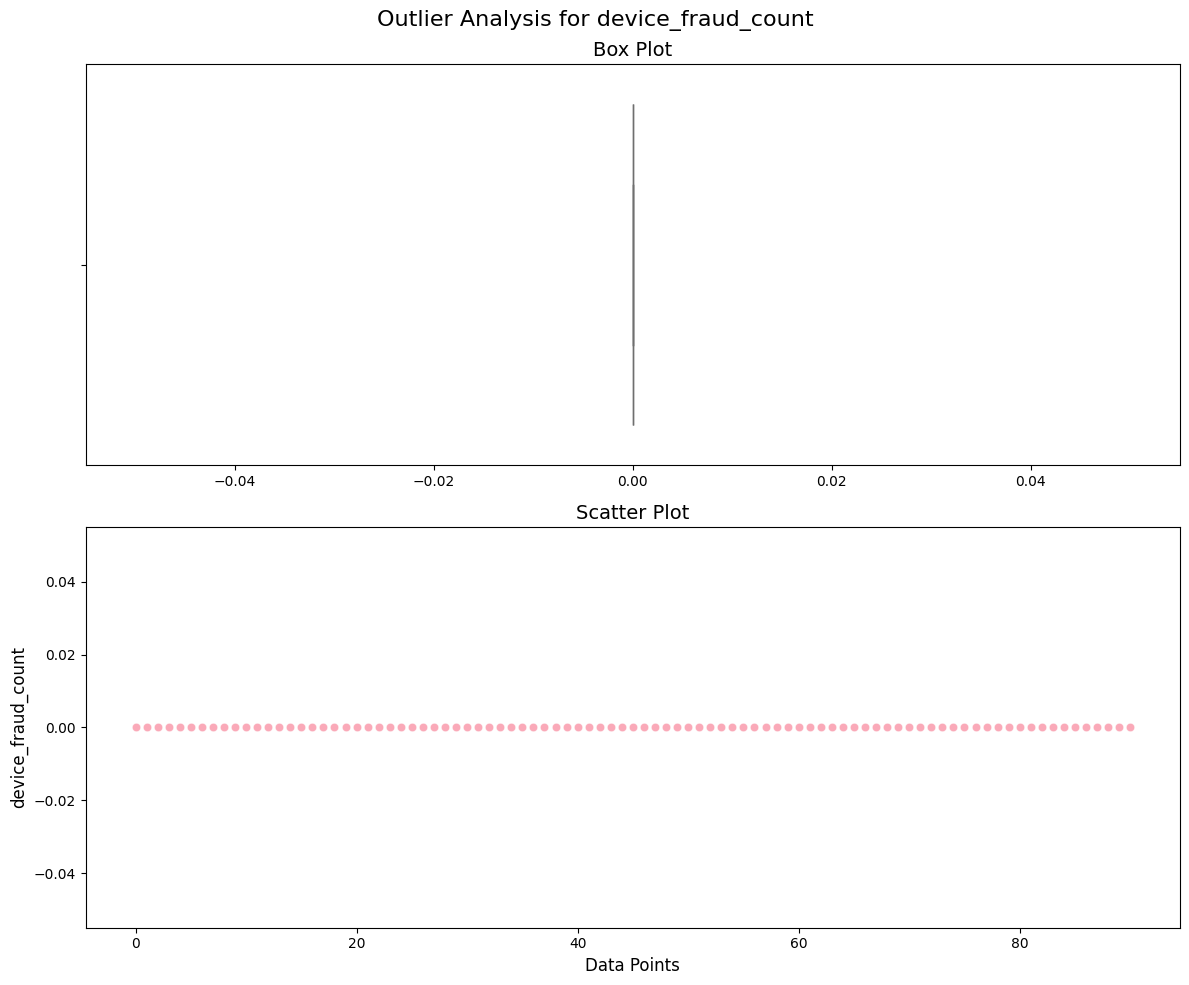

-------------------------

Outlier Analysis for month:
No outliers detected

Generating plots...


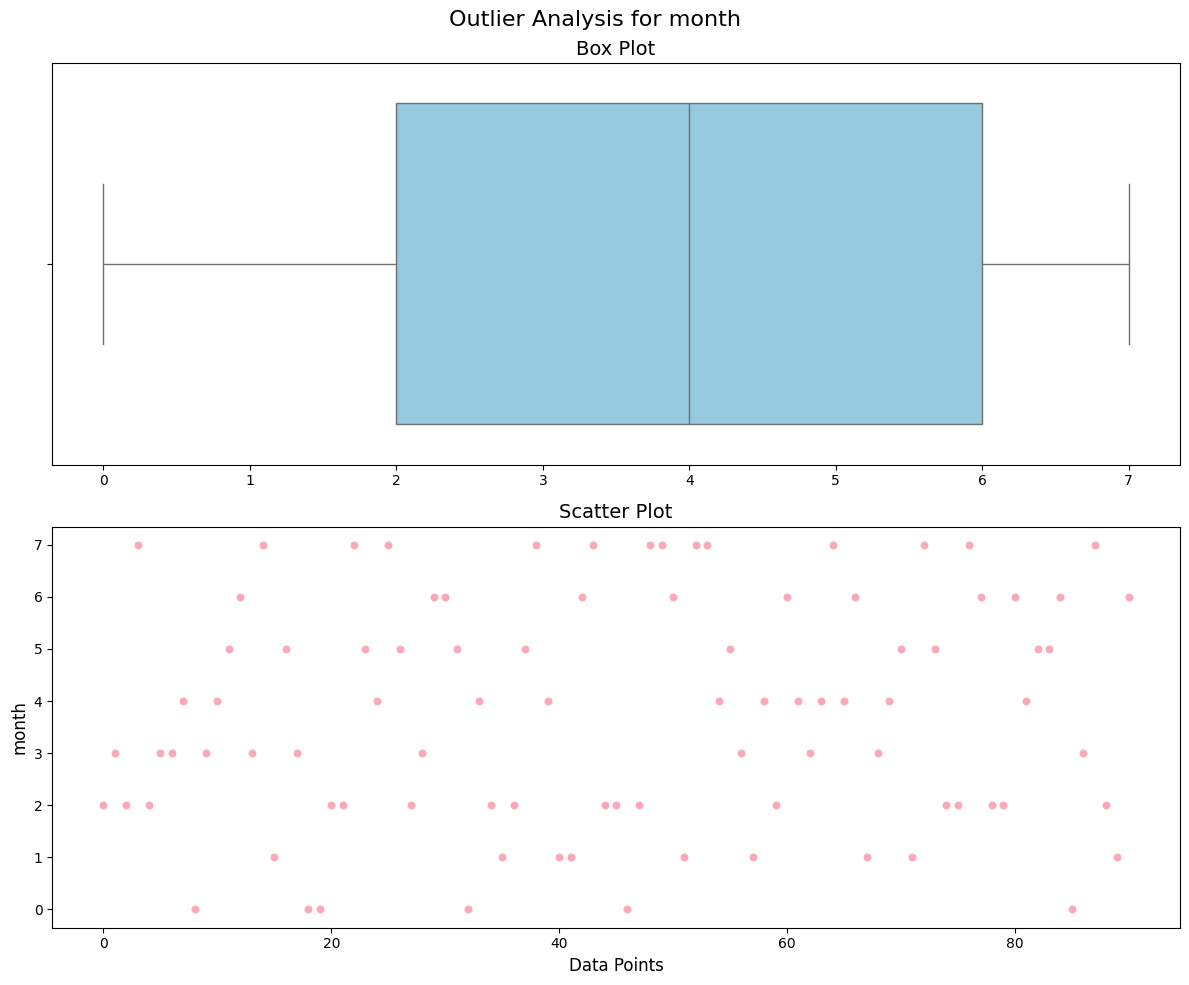

-------------------------

Outlier Analysis for x1:
No outliers detected

Generating plots...


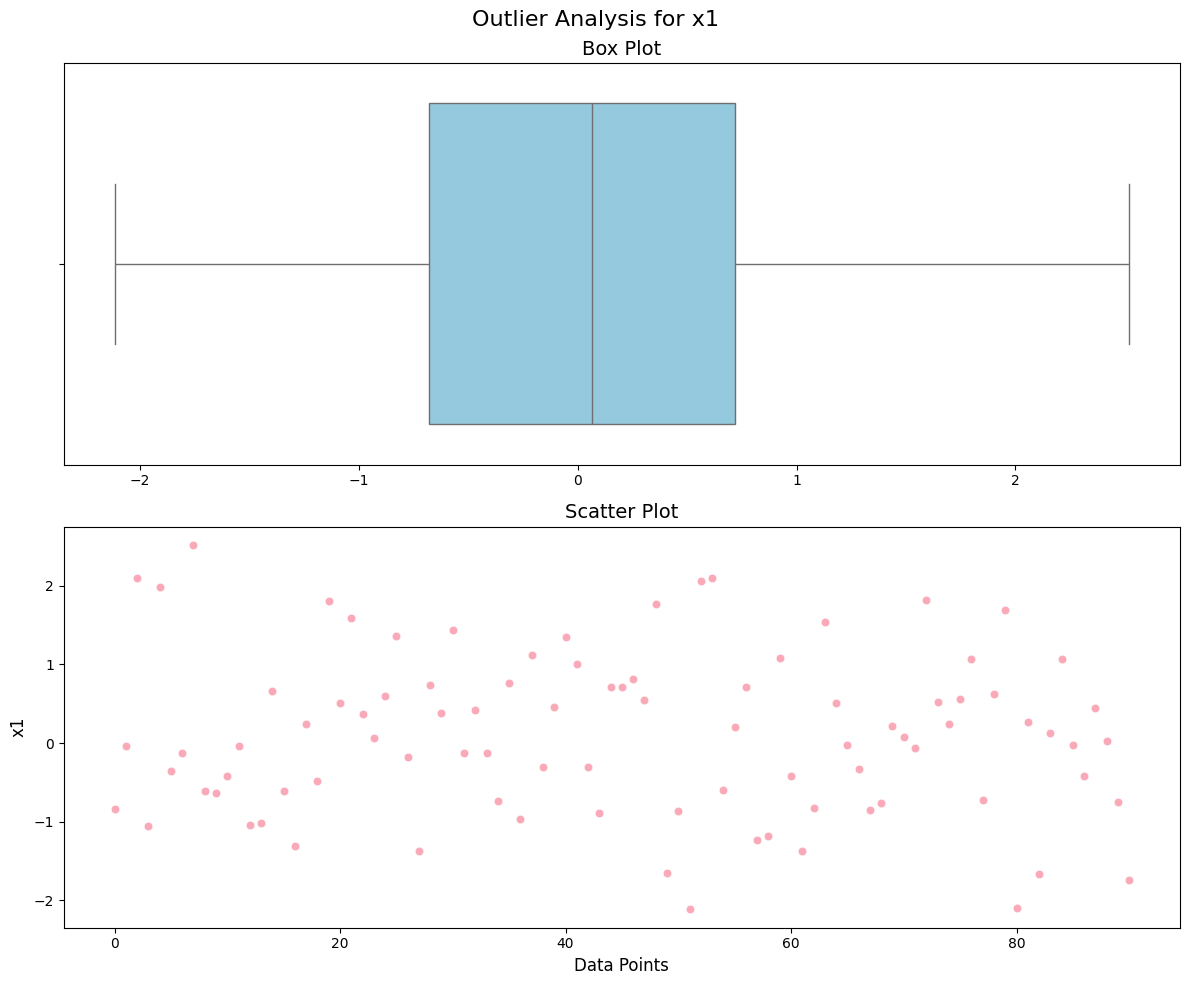

-------------------------

Outlier Analysis for x2:
Number of outliers: 2
Percentage of outliers: 2.20%
Sample of outliers:
          x2
7   3.508232
67  2.626776

Generating plots...


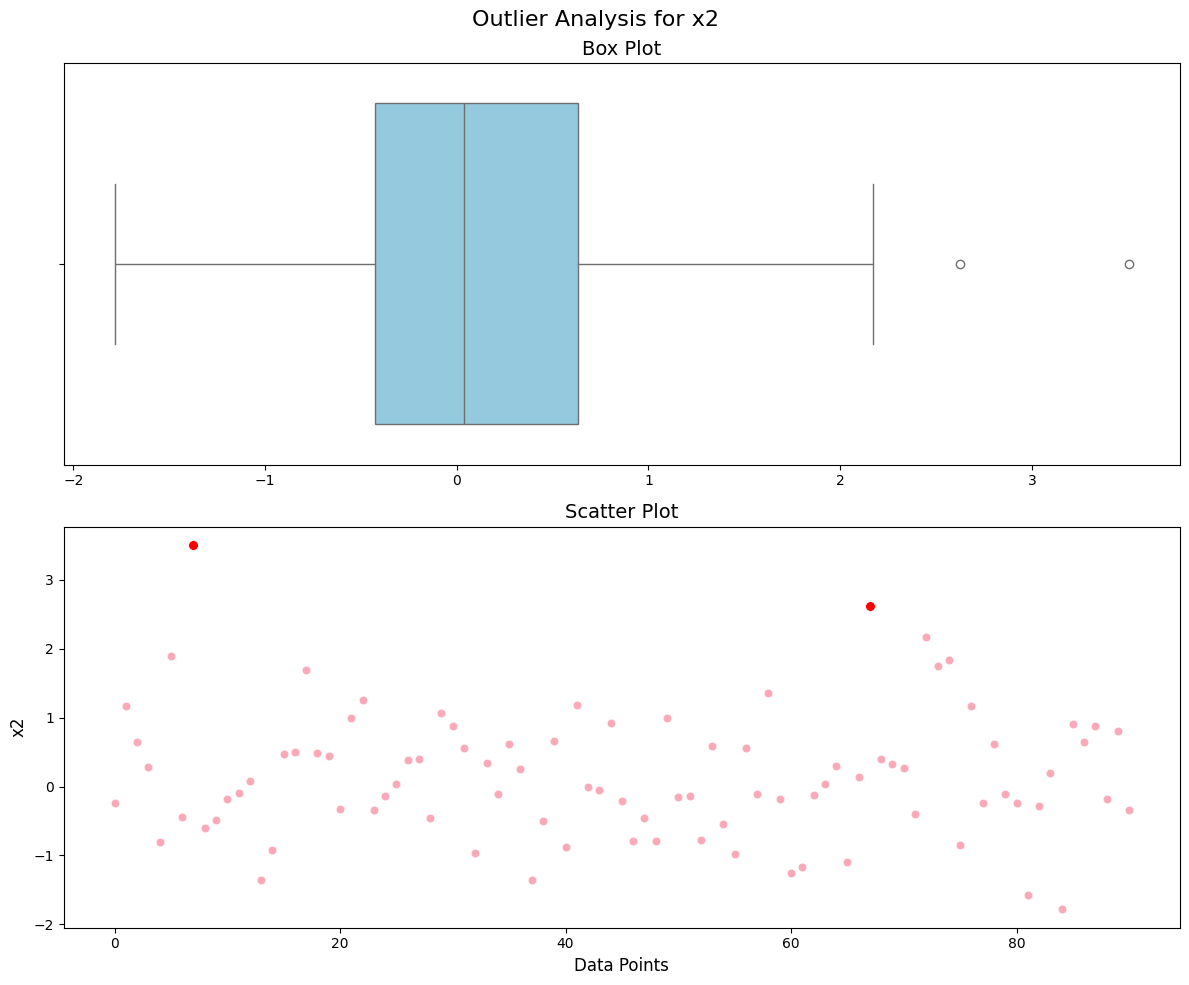

-------------------------


In [29]:
sns.set_palette("husl")

# Function to create beautiful outlier plots
def plot_outliers(df, column):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle(f'Outlier Analysis for {column}', fontsize=16)

    # Box plot
    sns.boxplot(x=df[column], ax=ax1, color='skyblue')
    ax1.set_title('Box Plot', fontsize=14)
    ax1.set_xlabel('')

    # Scatter plot
    sns.scatterplot(x=range(len(df)), y=df[column], ax=ax2, alpha=0.6)
    ax2.set_title('Scatter Plot', fontsize=14)
    ax2.set_xlabel('Data Points', fontsize=12)
    ax2.set_ylabel(column, fontsize=12)

    # Highlight outliers in scatter plot
    outliers = detect_outliers(df, column)
    if not outliers.empty:
        sns.scatterplot(x=outliers.index, y=outliers[column], color='red', s=50, ax=ax2)

    plt.tight_layout()
    plt.show()

# Analyze and plot outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    
    print(f"\nOutlier Analysis for {column}:")
    if not outliers.empty:
        print(f"Number of outliers: {len(outliers)}")
        print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")
        print("Sample of outliers:")
        print(outliers[[column]].head())
    else:
        print("No outliers detected")
    
    print("\nGenerating plots...")
    plot_outliers(df, column)
    print("-------------------------")